# Capstone_Bot_detection ( Group - 02 )
    
   #### Group Memmbers :- 
    1. Piyush Khupse,
    2. Sahil Radke,
    3. Pratik Haldankar,
    4. Prajakta Ippar,
    5. Shubham Rajput,
    6. Shubham Rajput.

- The data comprises of 17 columns and 1321188 observations.
- 11 columns are numerical attributes and 6 are categorical. 
- The last column is the ISBOT, which consits - 'True' indicates login through use of a BOT  and 'False' indicates human login.
- The intent is to predict the BOTs based on the variables. 



In [1]:
#Importing the first few required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from matplotlib.colors import ListedColormap

from scipy import stats

from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest

import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
 
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import classification_report,roc_auc_score,roc_curve,f1_score,confusion_matrix,accuracy_score
from sklearn.metrics import cohen_kappa_score
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
Data = pd.read_csv("kaggle_bot_accounts.csv")

In [3]:
Data.head(10)

Unnamed: 0                      NAME  GENDER                    EMAIL_ID  \
0           0         Johnny KerrThomas    Male     jacksonalan@example.com   
1           1         Dwayne LarsenLara    Male        calvin80@example.com   
2           2                       NaN    Male          qbrown@example.net   
3           3   Russell SimmonsPhillips    Male  kimberlywagner@example.com   
4           4      Jamie WilsonMartinez  Female     shaunbrooks@example.com   
5           5           Elijah ParkNeal    Male        mpearson@example.org   
6           6  Logan ZimmermanGallagher    Male   sparkschristy@example.org   
7           7          Erin HerreraKing  Female                         NaN   
8           8      Matthew RobertsGreer    Male    harrisregina@example.org   
9           9       Michael StoutGraves    Male          klopez@example.net   

  IS_GLOGIN  FOLLOWER_COUNT  FOLLOWING_COUNT  DATASET_COUNT  CODE_COUNT  \
0     False            53.0             87.0            5.0         3.0   
1      True            16.0             67.0            5.0         NaN   
2      True            44.0             81.0            4.0        17.0   
3      True            23.0            114.0            5.0        24.0   
4     False            46.0            112.0            2.0        12.0   
5     False             2.0              2.0            0.0         0.0   
6       NaN            46.0             36.0            0.0        16.0   
7     False             2.0              1.0            0.0         0.0   
8      True            50.0             25.0            1.0         7.0   
9      True            65.0             99.0            7.0        19.0   

   DISCUSSION_COUNT  AVG_NB_READ_TIME_MIN REGISTRATION_IPV4  \
0             124.0                   NaN      81.88.75.170   
1              26.0                 24.97               NaN   
2             125.0                  7.75   159.202.103.178   
3              67.0                 13.40     196.11.132.51   
4              63.0                 24.83    159.196.199.20   
5               0.0                  0.62     72.175.201.72   
6              77.0                 22.32    133.206.76.136   
7               6.0                  1.85     39.214.115.81   
8             122.0                   NaN    192.177.30.226   
9              93.0                  8.79     68.230.133.41   

                          REGISTRATION_LOCATION  TOTAL_VOTES_GAVE_NB  \
0                                     Argentina                 16.0   
1                                   New Zealand                 14.0   
2                                    Costa Rica                 16.0   
3                                         Italy                 21.0   
4                                       Belgium                 10.0   
5                              French Polynesia                 18.0   
6  South Georgia and the South Sandwich Islands                  NaN   
7  Antarctica (the territory South of 60 deg S)                 21.0   
8                                           NaN                  NaN   
9                                   Saint Lucia                 24.0   

   TOTAL_VOTES_GAVE_DS  TOTAL_VOTES_GAVE_DC  ISBOT  
0                 10.0                  3.0    NaN  
1                  5.0                  2.0    NaN  
2                  4.0                  0.0  False  
3                 10.0                  1.0  False  
4                  6.0                  2.0  False  
5                  9.0                  2.0   True  
6                  9.0                  1.0  False  
7                  3.0                  1.0   True  
8                  7.0                  3.0  False  
9                  7.0                  2.0  False

#### Redundant attribute: Unnamed 0 

 - The Unnamed Column serves as an index, since the values contain serial number so we can set such column as index and later drop it.

### Initial Data Exploration

In [4]:
Data.set_index("Unnamed: 0", inplace=True)

In [5]:
#Reading the Dataset
Data.head()

NAME  GENDER                    EMAIL_ID  \
Unnamed: 0                                                                
0                 Johnny KerrThomas    Male     jacksonalan@example.com   
1                 Dwayne LarsenLara    Male        calvin80@example.com   
2                               NaN    Male          qbrown@example.net   
3           Russell SimmonsPhillips    Male  kimberlywagner@example.com   
4              Jamie WilsonMartinez  Female     shaunbrooks@example.com   

           IS_GLOGIN  FOLLOWER_COUNT  FOLLOWING_COUNT  DATASET_COUNT  \
Unnamed: 0                                                             
0              False            53.0             87.0            5.0   
1               True            16.0             67.0            5.0   
2               True            44.0             81.0            4.0   
3               True            23.0            114.0            5.0   
4              False            46.0            112.0            2.0   

            CODE_COUNT  DISCUSSION_COUNT  AVG_NB_READ_TIME_MIN  \
Unnamed: 0                                                       
0                  3.0             124.0                   NaN   
1                  NaN              26.0                 24.97   
2                 17.0             125.0                  7.75   
3                 24.0              67.0                 13.40   
4                 12.0              63.0                 24.83   

           REGISTRATION_IPV4 REGISTRATION_LOCATION  TOTAL_VOTES_GAVE_NB  \
Unnamed: 0                                                                
0               81.88.75.170             Argentina                 16.0   
1                        NaN           New Zealand                 14.0   
2            159.202.103.178            Costa Rica                 16.0   
3              196.11.132.51                 Italy                 21.0   
4             159.196.199.20               Belgium                 10.0   

            TOTAL_VOTES_GAVE_DS  TOTAL_VOTES_GAVE_DC  ISBOT  
Unnamed: 0                                                   
0                          10.0                  3.0    NaN  
1                           5.0                  2.0    NaN  
2                           4.0                  0.0  False  
3                          10.0                  1.0  False  
4                           6.0                  2.0  False

In [6]:
#Cheking the shape i.e (no.of rows,no.columns)
Data.shape

(1321188, 16)

In [7]:
#Checking the types of variables
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1321188 entries, 0 to 1321187
Data columns (total 16 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   NAME                   1243024 non-null  object 
 1   GENDER                 1243309 non-null  object 
 2   EMAIL_ID               1243374 non-null  object 
 3   IS_GLOGIN              1243272 non-null  object 
 4   FOLLOWER_COUNT         1243476 non-null  float64
 5   FOLLOWING_COUNT        1242743 non-null  float64
 6   DATASET_COUNT          1242621 non-null  float64
 7   CODE_COUNT             1243262 non-null  float64
 8   DISCUSSION_COUNT       1243466 non-null  float64
 9   AVG_NB_READ_TIME_MIN   1242872 non-null  float64
 10  REGISTRATION_IPV4      1242859 non-null  object 
 11  REGISTRATION_LOCATION  1242898 non-null  object 
 12  TOTAL_VOTES_GAVE_NB    1243483 non-null  float64
 13  TOTAL_VOTES_GAVE_DS    1243254 non-null  float64
 14  TOTAL_VOTES_GAVE_D

In [8]:
# Checking for the null value columns and its percentage
Data.isnull().sum()/len(Data)*100

NAME                     5.916191
GENDER                   5.894619
EMAIL_ID                 5.889699
IS_GLOGIN                5.897420
FOLLOWER_COUNT           5.881979
FOLLOWING_COUNT          5.937459
DATASET_COUNT            5.946693
CODE_COUNT               5.898176
DISCUSSION_COUNT         5.882736
AVG_NB_READ_TIME_MIN     5.927695
REGISTRATION_IPV4        5.928679
REGISTRATION_LOCATION    5.925727
TOTAL_VOTES_GAVE_NB      5.881449
TOTAL_VOTES_GAVE_DS      5.898782
TOTAL_VOTES_GAVE_DC      5.906048
ISBOT                    5.941622
dtype: float64

- Here we can see there are missing values in the Data

In [9]:
# Statistical description of the data for numerical columns 
Data.describe().T

count       mean        std   min    25%    50%  \
FOLLOWER_COUNT        1243476.0  26.982729  23.005042   0.0   2.00  24.00   
FOLLOWING_COUNT       1242743.0  45.050914  39.477157   0.0   3.00  39.00   
DATASET_COUNT         1242621.0   2.562564   2.499882   0.0   0.00   2.00   
CODE_COUNT            1243262.0  10.384503   8.248055   0.0   1.00  10.00   
DISCUSSION_COUNT      1243466.0  65.842444  47.543149   0.0  13.00  65.00   
AVG_NB_READ_TIME_MIN  1242872.0  12.742246   9.564920   0.0   1.87  12.29   
TOTAL_VOTES_GAVE_NB   1243483.0  17.506563   4.611783  10.0  14.00  18.00   
TOTAL_VOTES_GAVE_DS   1243254.0   6.501007   2.290951   3.0   5.00   7.00   
TOTAL_VOTES_GAVE_DC   1243158.0   1.500373   1.118067   0.0   1.00   2.00   

                         75%     max  
FOLLOWER_COUNT         47.00   70.00  
FOLLOWING_COUNT        80.00  120.00  
DATASET_COUNT           5.00    7.00  
CODE_COUNT             18.00   25.00  
DISCUSSION_COUNT      108.00  150.00  
AVG_NB_READ_TIME_MIN   21.19   29.99  
TOTAL_VOTES_GAVE_NB    22.00   25.00  
TOTAL_VOTES_GAVE_DS     9.00   10.00  
TOTAL_VOTES_GAVE_DC     3.00    3.00

In [10]:
#Statistical description of categorical or object type columns
Data.describe(include='object').T

count   unique                 top    freq
NAME                   1243024  1199433    David SmithSmith      17
GENDER                 1243309        2                Male  932220
EMAIL_ID               1243374   603013  csmith@example.org     117
IS_GLOGIN              1243272        2               False  788359
REGISTRATION_IPV4      1242859  1242579      195.32.175.129       2
REGISTRATION_LOCATION  1242898      243               Korea   10128
ISBOT                  1242688        2               False  909794

In [11]:
## split of the IS_GLOGIN column between the two levels True and False
print(Data.IS_GLOGIN.describe())

## split of the ISBOT column between the two levels True and False
print(Data.ISBOT.describe())

count     1243272
unique          2
top         False
freq       788359
Name: IS_GLOGIN, dtype: object
count     1242688
unique          2
top         False
freq       909794
Name: ISBOT, dtype: object


Inferences: - Checking if there are any missing values in the dataset. Turns out there are a number of outliers in the Data.
 - Checking the frequency of the different values of the column.
 - Abnormal is columns NAME,EMAIL_ID,REGISTRATION_IPV4,REGISTRATION_LOCATION have unusual unique value.
 - This means that it is not really an unbalanced dataset.

### Missing Value Treatment

In [12]:
from sklearn.impute import SimpleImputer

# Separate numeric and non-numeric columns
numeric_cols = Data.select_dtypes(include='number').columns
categorical_cols = Data.select_dtypes(exclude='number').columns

# Impute missing values using SimpleImputer
imputer_numeric = SimpleImputer(strategy='mean')
df_imputed_numeric = imputer_numeric.fit_transform(Data[numeric_cols])

imputer_non_numeric = SimpleImputer(strategy='most_frequent')
df_imputed_non_numeric = imputer_non_numeric.fit_transform(Data[categorical_cols])

# Convert the numpy arrays back to a pandas dataframe
df_imputed_numeric = pd.DataFrame(df_imputed_numeric, columns=numeric_cols)
df_imputed_non_numeric = pd.DataFrame(df_imputed_non_numeric, columns=categorical_cols)

# Concatenate the two dataframes back together
df_imputed = pd.concat([df_imputed_numeric, df_imputed_non_numeric], axis=1)

 check if the missing value treatment is correctly done

In [13]:
df_imputed.isnull().sum() 

FOLLOWER_COUNT           0
FOLLOWING_COUNT          0
DATASET_COUNT            0
CODE_COUNT               0
DISCUSSION_COUNT         0
AVG_NB_READ_TIME_MIN     0
TOTAL_VOTES_GAVE_NB      0
TOTAL_VOTES_GAVE_DS      0
TOTAL_VOTES_GAVE_DC      0
NAME                     0
GENDER                   0
EMAIL_ID                 0
IS_GLOGIN                0
REGISTRATION_IPV4        0
REGISTRATION_LOCATION    0
ISBOT                    0
dtype: int64

In [14]:
# No null values

## Univariate Analysis

### Box Plots
To visualise the above data exploration, we make use of Box Plots as we are comparing Categorical and continuous variables.


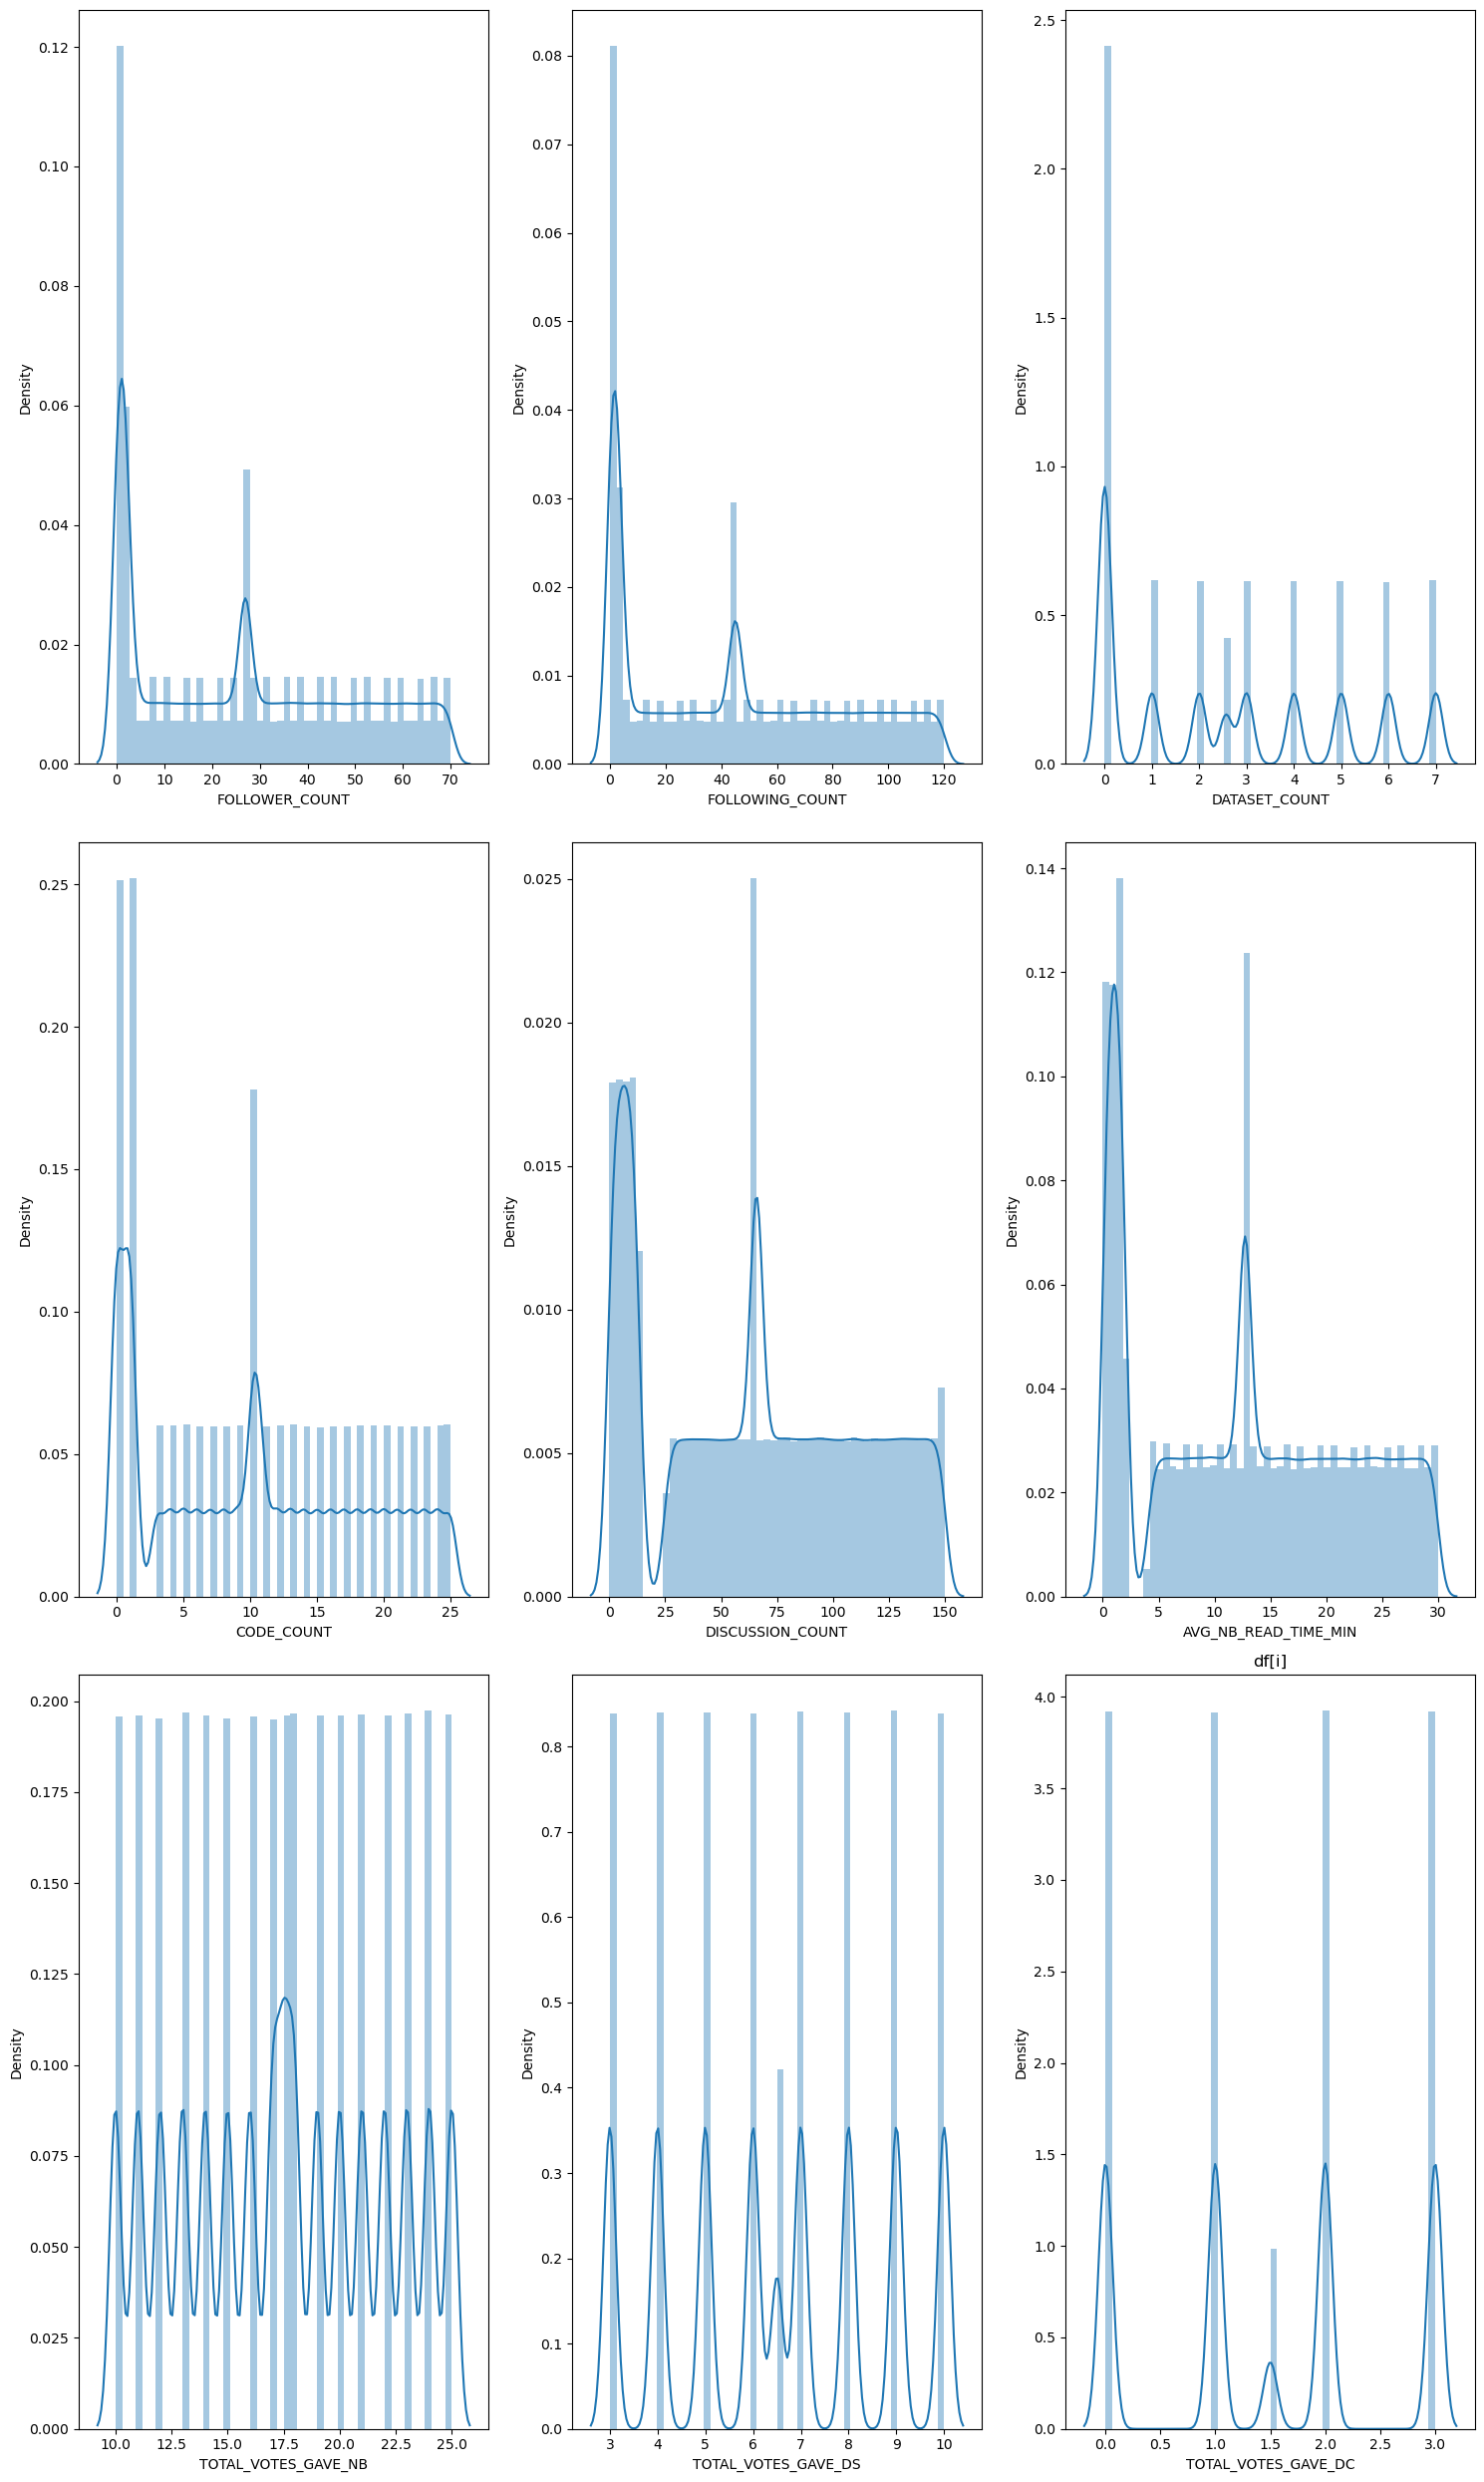

In [15]:
fig, ax = plt.subplots(3,3, figsize = (15,25))
for i, subplots in zip(df_imputed.select_dtypes(include=np.number), ax.flatten()):
    sns.distplot(df_imputed[i],ax = subplots)
    plt.title('df[i]')
plt.tight_layout()
plt.show()

In [16]:
df_imputed.skew()

FOLLOWER_COUNT          0.335562
FOLLOWING_COUNT         0.370087
DATASET_COUNT           0.457189
CODE_COUNT              0.227549
DISCUSSION_COUNT        0.132172
AVG_NB_READ_TIME_MIN    0.183421
TOTAL_VOTES_GAVE_NB    -0.001802
TOTAL_VOTES_GAVE_DS    -0.000917
TOTAL_VOTES_GAVE_DC    -0.000789
IS_GLOGIN               0.655289
ISBOT                   1.142644
dtype: float64

For Classification problem the data should normalize or the skewness should be normalize, since there is less skewness we have not performed normalization.

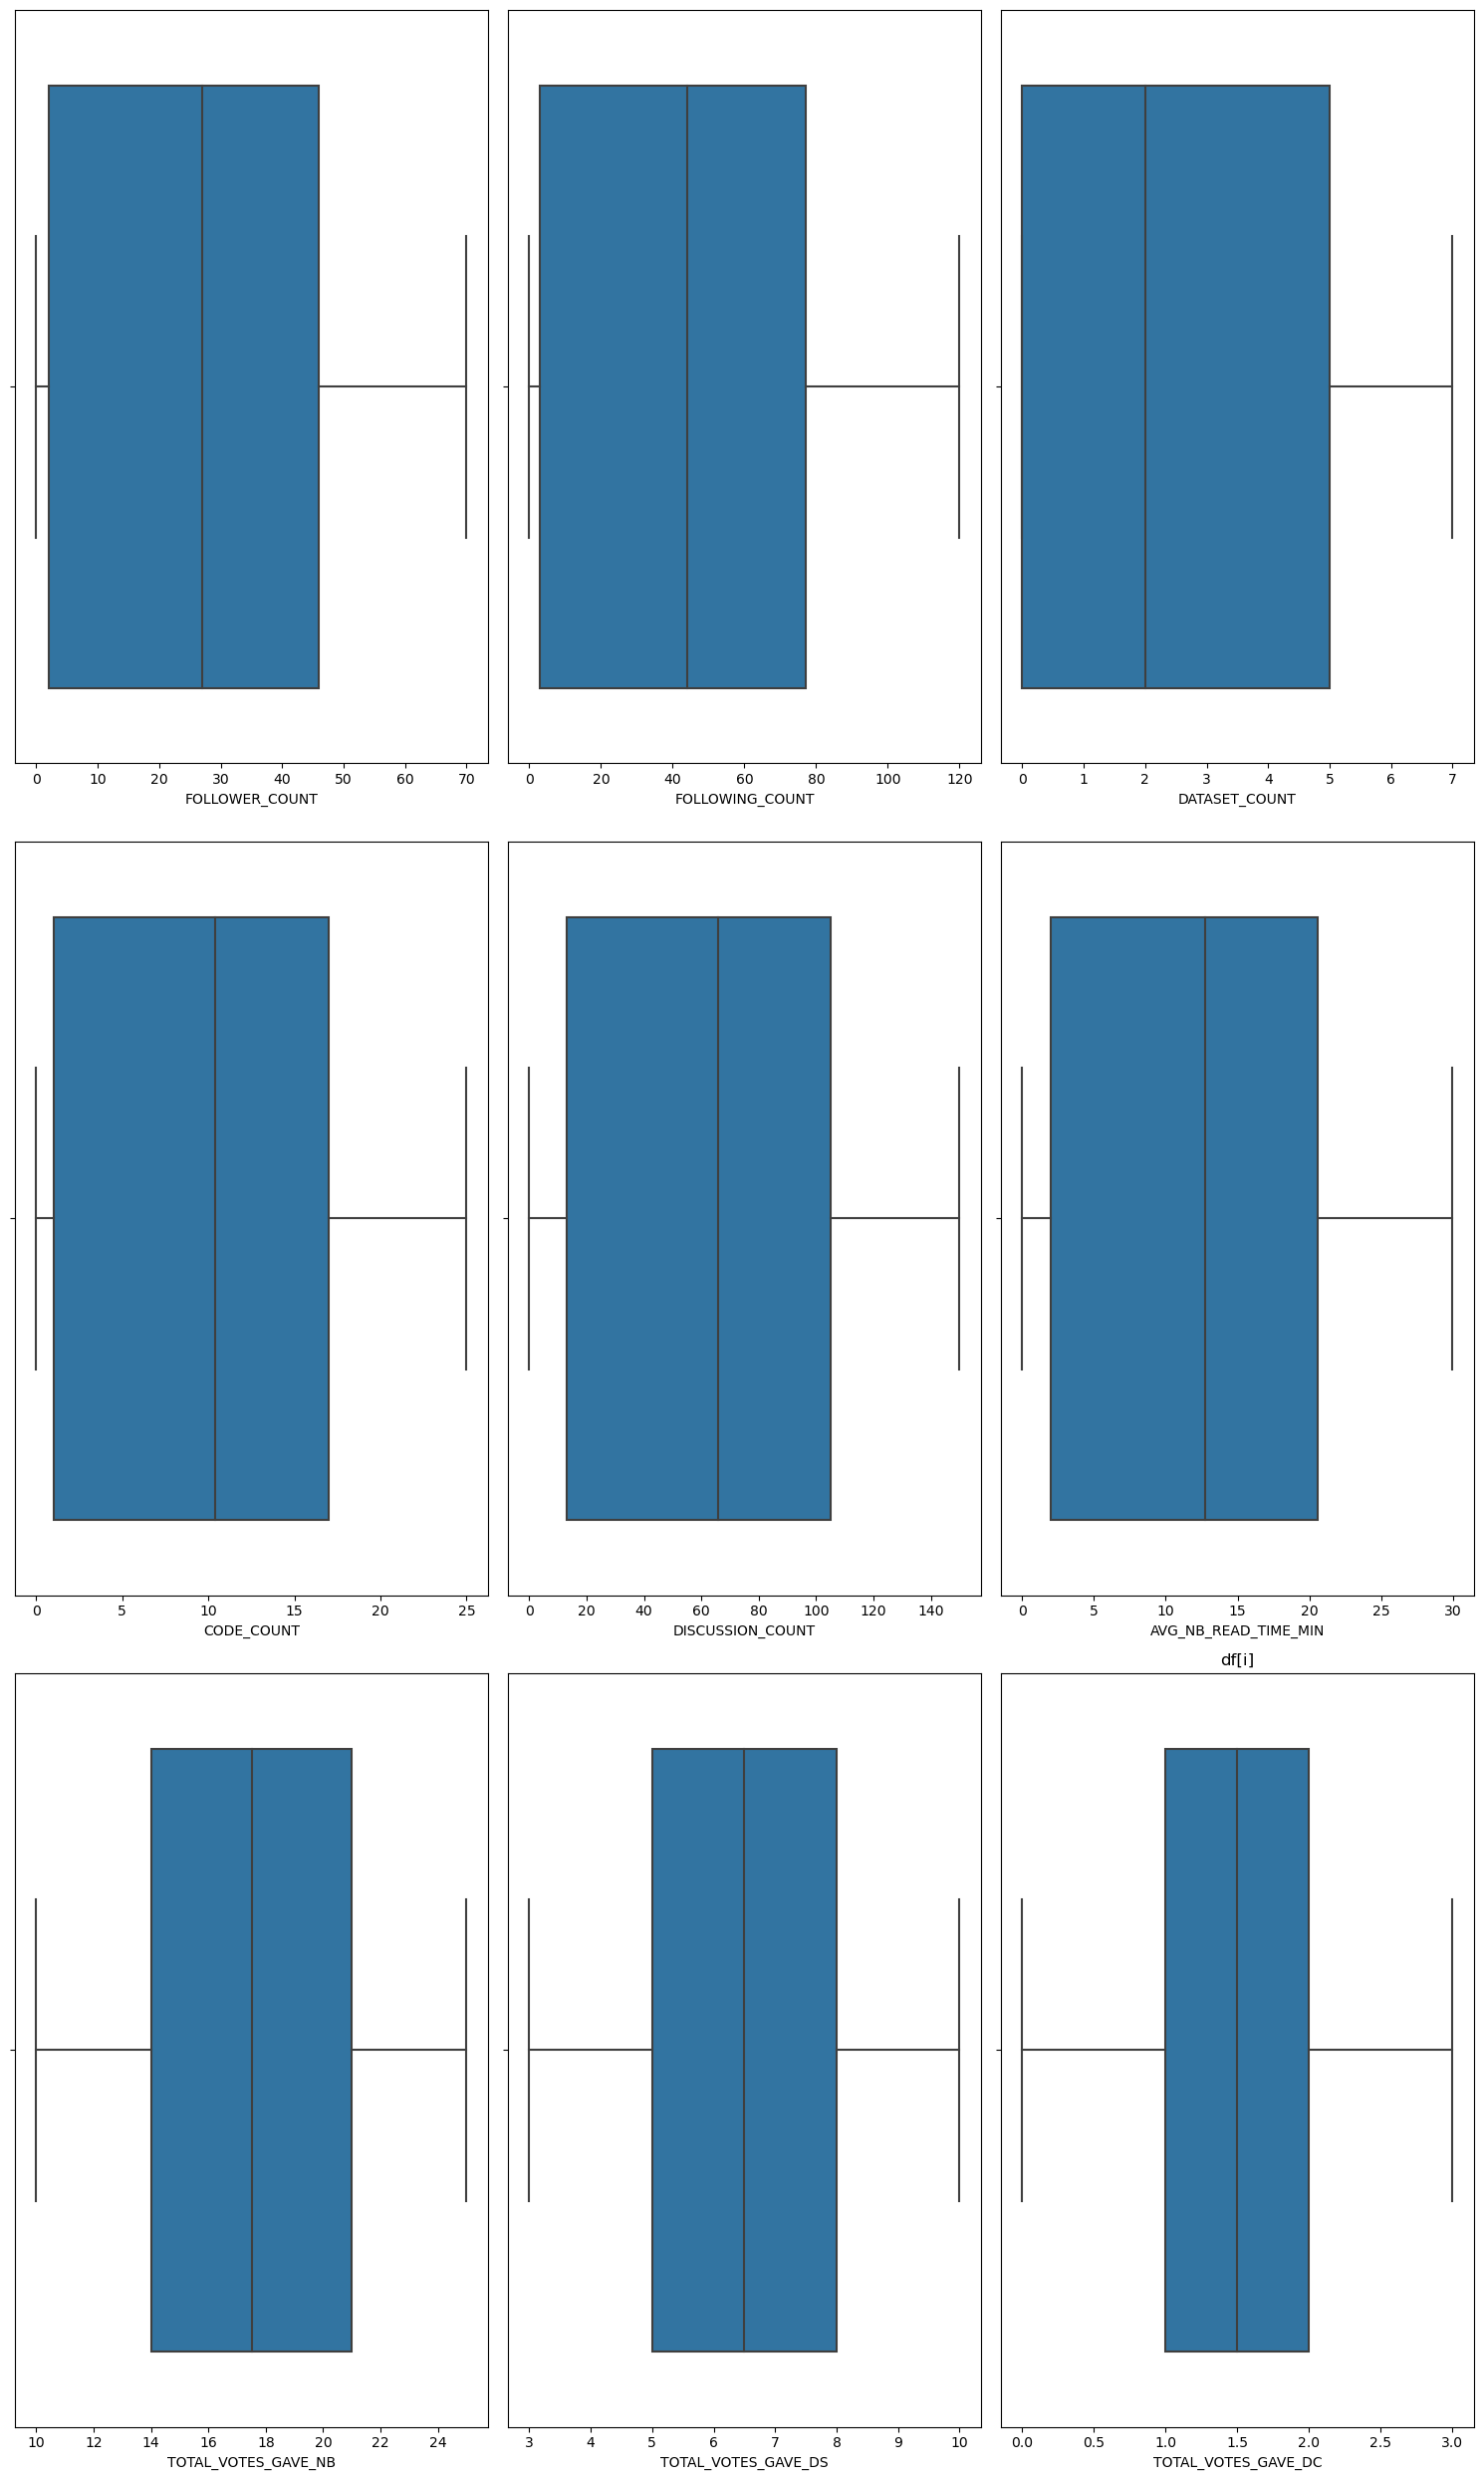

In [17]:
## Generating 3*3 matrix of box plots

fig, ax = plt.subplots(3,3, figsize = (15,25))
for i, subplots in zip(df_imputed.select_dtypes(include=np.number), ax.flatten()):
    sns.boxplot(df_imputed[i],ax = subplots)
    plt.title('df[i]')
plt.tight_layout()
plt.show()

Observation that jumps out:
 - There are no outliers in the Data

In [18]:
cat_cols = df_imputed[['ISBOT','GENDER','IS_GLOGIN']]

In [19]:
for i in cat_cols:
    print(cat_cols[i].value_counts(normalize=True))

False    0.748034
True     0.251966
Name: ISBOT, dtype: float64
Male      0.764538
Female    0.235462
Name: GENDER, dtype: float64
False    0.655679
True     0.344321
Name: IS_GLOGIN, dtype: float64


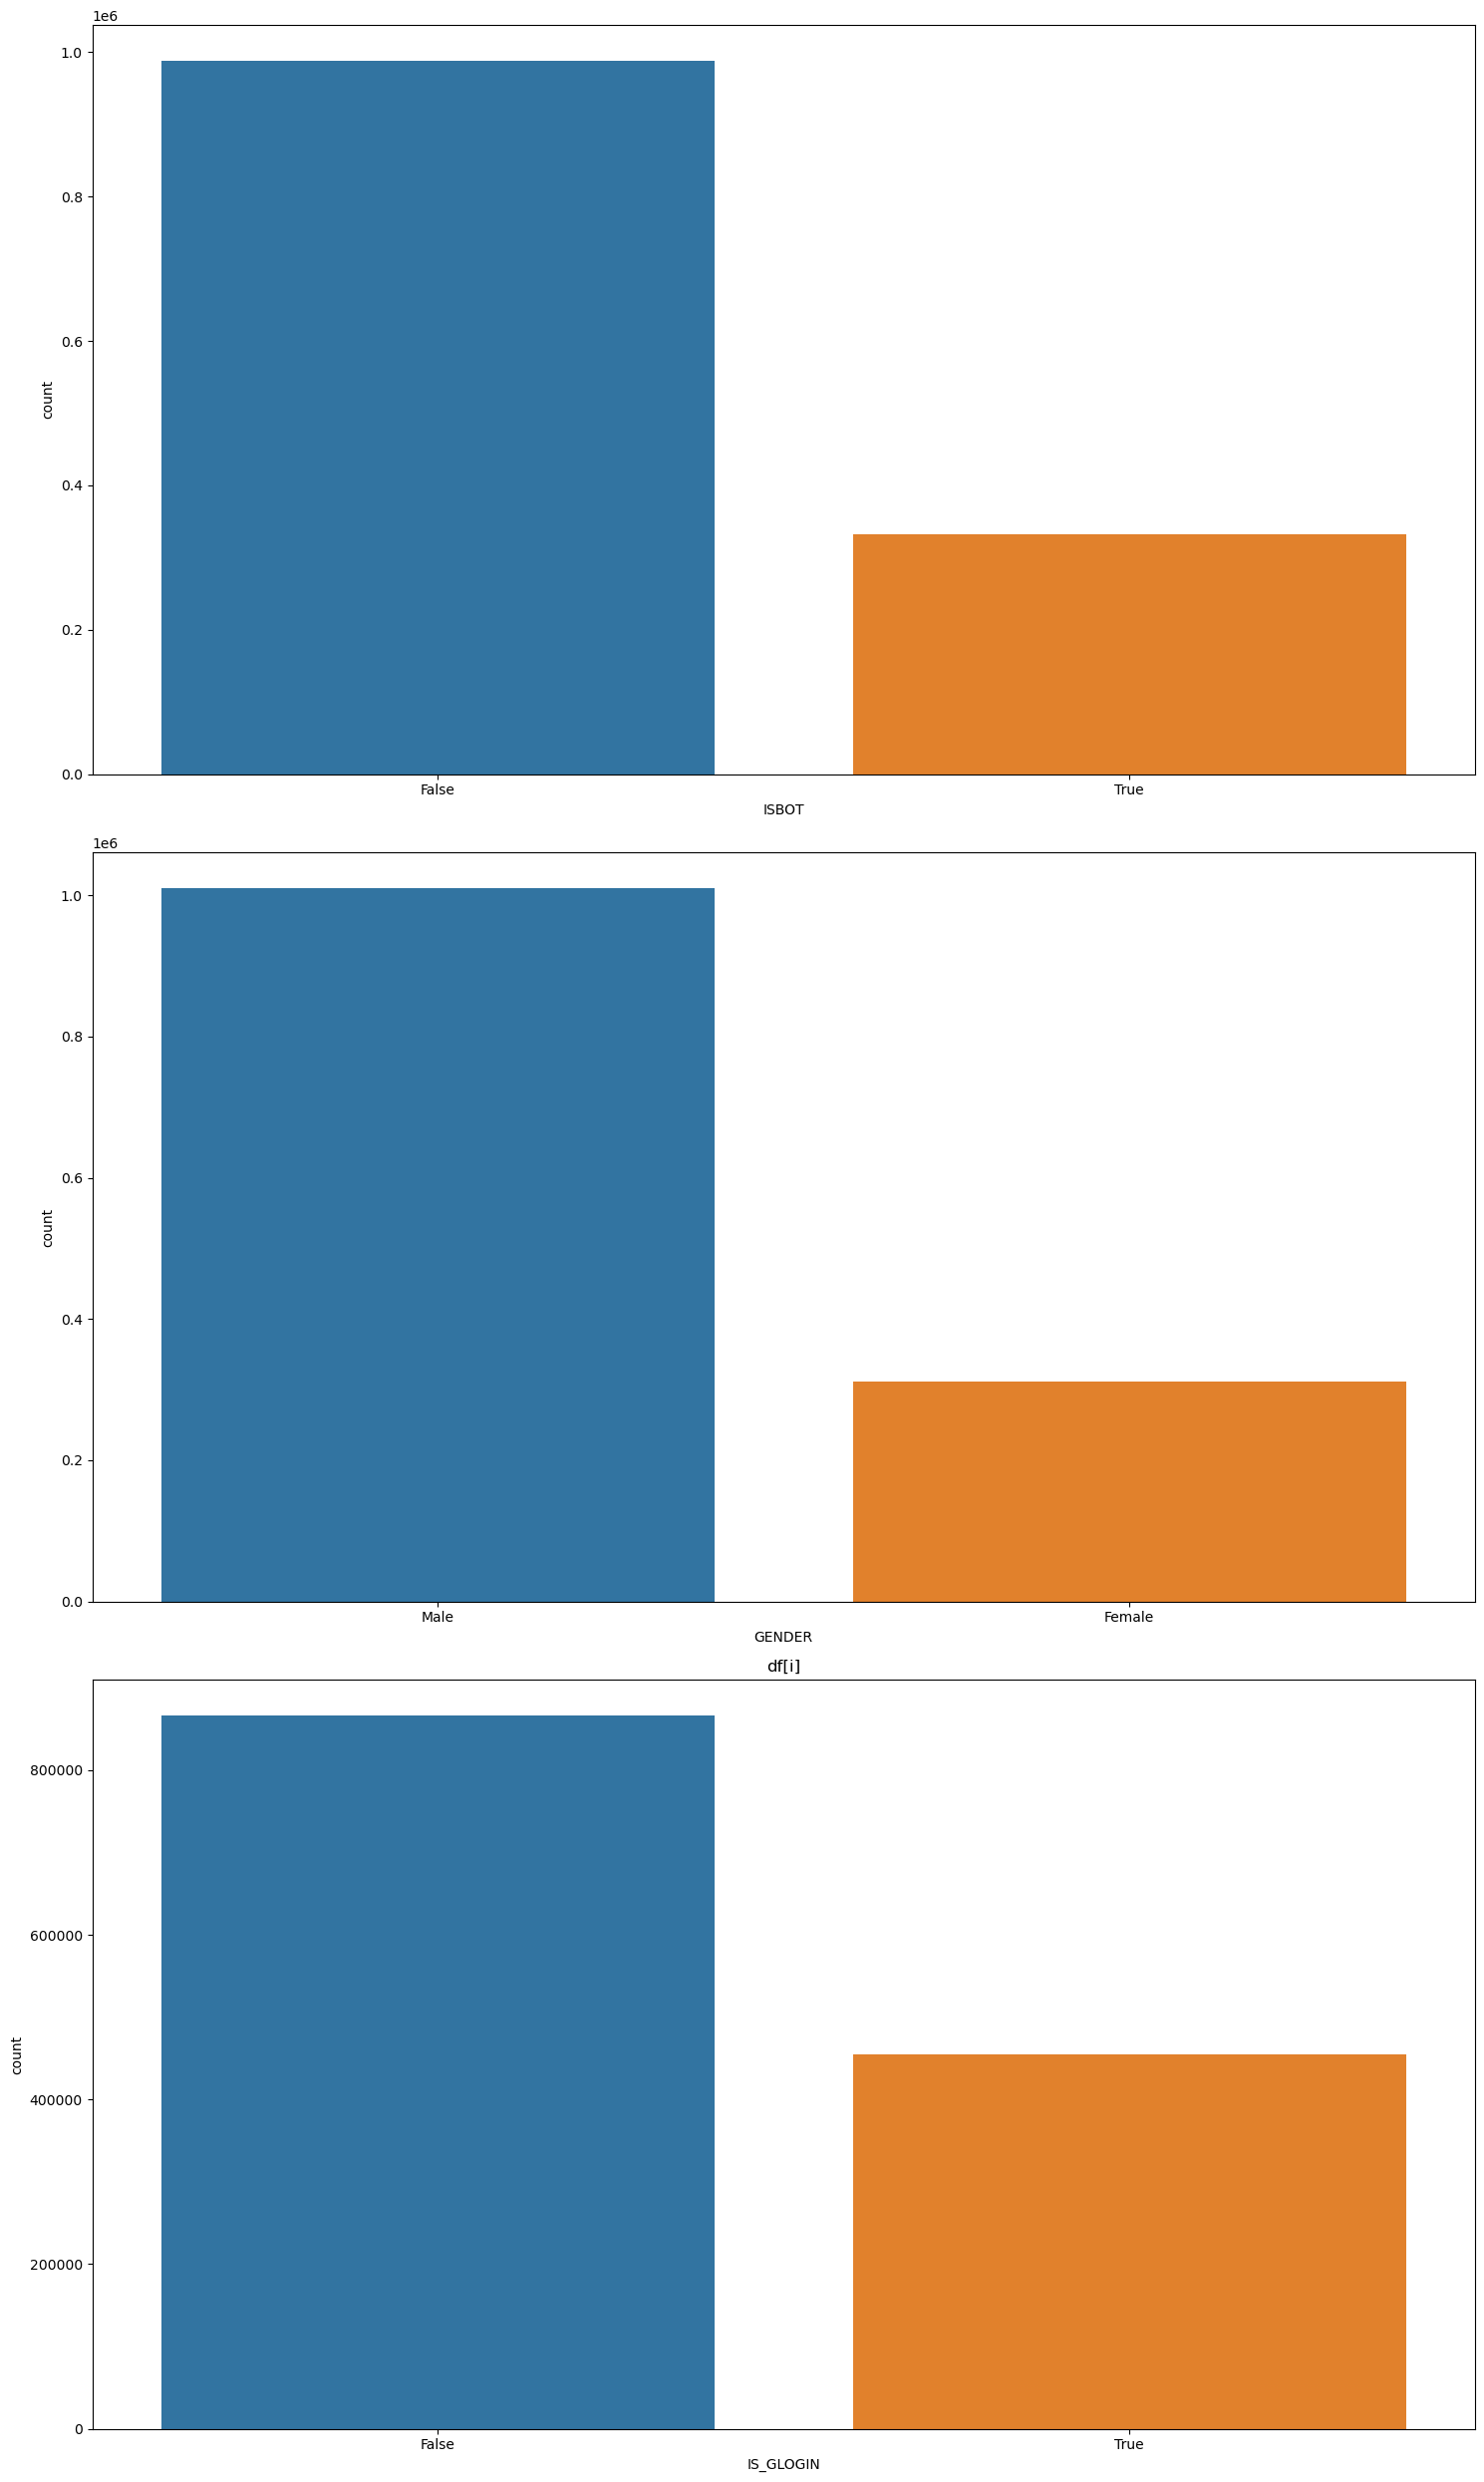

In [20]:
fig, ax = plt.subplots(3,1, figsize = (15,25))
for i, subplots in zip(cat_cols, ax.flatten()):
    sns.countplot(cat_cols[i],ax = subplots)
    plt.title('df[i]')
plt.tight_layout()
plt.show()

Inferance:- Data is slightly imbalanced and class 0(False) is dominating so if decide to balance it, there are 2 approches first is over_sampling and the other is under sampling. By doing under sampling the data will reduce and data will lose some paterns so instead of under sample we can prefer to over sample the data.Since this method introduces some bias in the data we prefer not to perform any sampling.

## Bi-variate analysis - Relation of each predictor with Target variable

The ISBOT column has two values - 'True' and 'False'. We would like to explore how each of the 9 predictor variables vary with respect to the ISBOT value. We would be more interested in those predictor variables which have a noticeable difference in their values corresponding to 'True' and 'False'. 

We calculate the mean/ median of values corresponding to True and False for each of the predictor variables. Some observations:

 - The last three variables have  not much difference in the means corresponding to True and False.
 - There is not much diffrence between the mean and median of all variable values for both True and False

In [21]:
df_imputed.groupby('ISBOT').mean()

FOLLOWER_COUNT  FOLLOWING_COUNT  DATASET_COUNT  CODE_COUNT  \
ISBOT                                                               
False       35.222478        58.854524       3.374033   13.516562   
True         2.520606         4.070829       0.153479    1.086061   

       DISCUSSION_COUNT  AVG_NB_READ_TIME_MIN  TOTAL_VOTES_GAVE_NB  \
ISBOT                                                                
False         84.653089             16.450068            17.502158   
True           9.997499              1.734484            17.519643   

       TOTAL_VOTES_GAVE_DS  TOTAL_VOTES_GAVE_DC  
ISBOT                                            
False             6.498993             1.501044  
True              6.506985             1.498382

In [22]:
df_imputed.groupby('ISBOT').median()

FOLLOWER_COUNT  FOLLOWING_COUNT  DATASET_COUNT  CODE_COUNT  \
ISBOT                                                               
False            34.0             56.0            3.0        13.0   
True              1.0              2.0            0.0         1.0   

       DISCUSSION_COUNT  AVG_NB_READ_TIME_MIN  TOTAL_VOTES_GAVE_NB  \
ISBOT                                                                
False              82.0                 15.87            17.506563   
True                7.0                  1.13            17.506563   

       TOTAL_VOTES_GAVE_DS  TOTAL_VOTES_GAVE_DC  
ISBOT                                            
False             6.501007             1.500373  
True              6.501007             1.500373

In [23]:
df_imputed.groupby('IS_GLOGIN').mean()

FOLLOWER_COUNT  FOLLOWING_COUNT  DATASET_COUNT  CODE_COUNT  \
IS_GLOGIN                                                               
False           22.292821        37.182883       2.099531    8.601192   
True            35.913557        60.033732       3.444302   13.780400   

           DISCUSSION_COUNT  AVG_NB_READ_TIME_MIN  TOTAL_VOTES_GAVE_NB  \
IS_GLOGIN                                                                
False             55.121873             10.622599            17.507920   
True              86.257255             16.778617            17.503979   

           TOTAL_VOTES_GAVE_DS  TOTAL_VOTES_GAVE_DC  
IS_GLOGIN                                            
False                 6.503428             1.499971  
True                  6.496397             1.501139

In [24]:
df_imputed.groupby('IS_GLOGIN').median()

FOLLOWER_COUNT  FOLLOWING_COUNT  DATASET_COUNT  CODE_COUNT  \
IS_GLOGIN                                                               
False                17.0             26.0            1.0         7.0   
True                 34.0             57.0            3.0        13.0   

           DISCUSSION_COUNT  AVG_NB_READ_TIME_MIN  TOTAL_VOTES_GAVE_NB  \
IS_GLOGIN                                                                
False                  51.0                  9.43            17.506563   
True                   84.0                 16.23            17.506563   

           TOTAL_VOTES_GAVE_DS  TOTAL_VOTES_GAVE_DC  
IS_GLOGIN                                            
False                 6.501007             1.500373  
True                  6.501007             1.500373

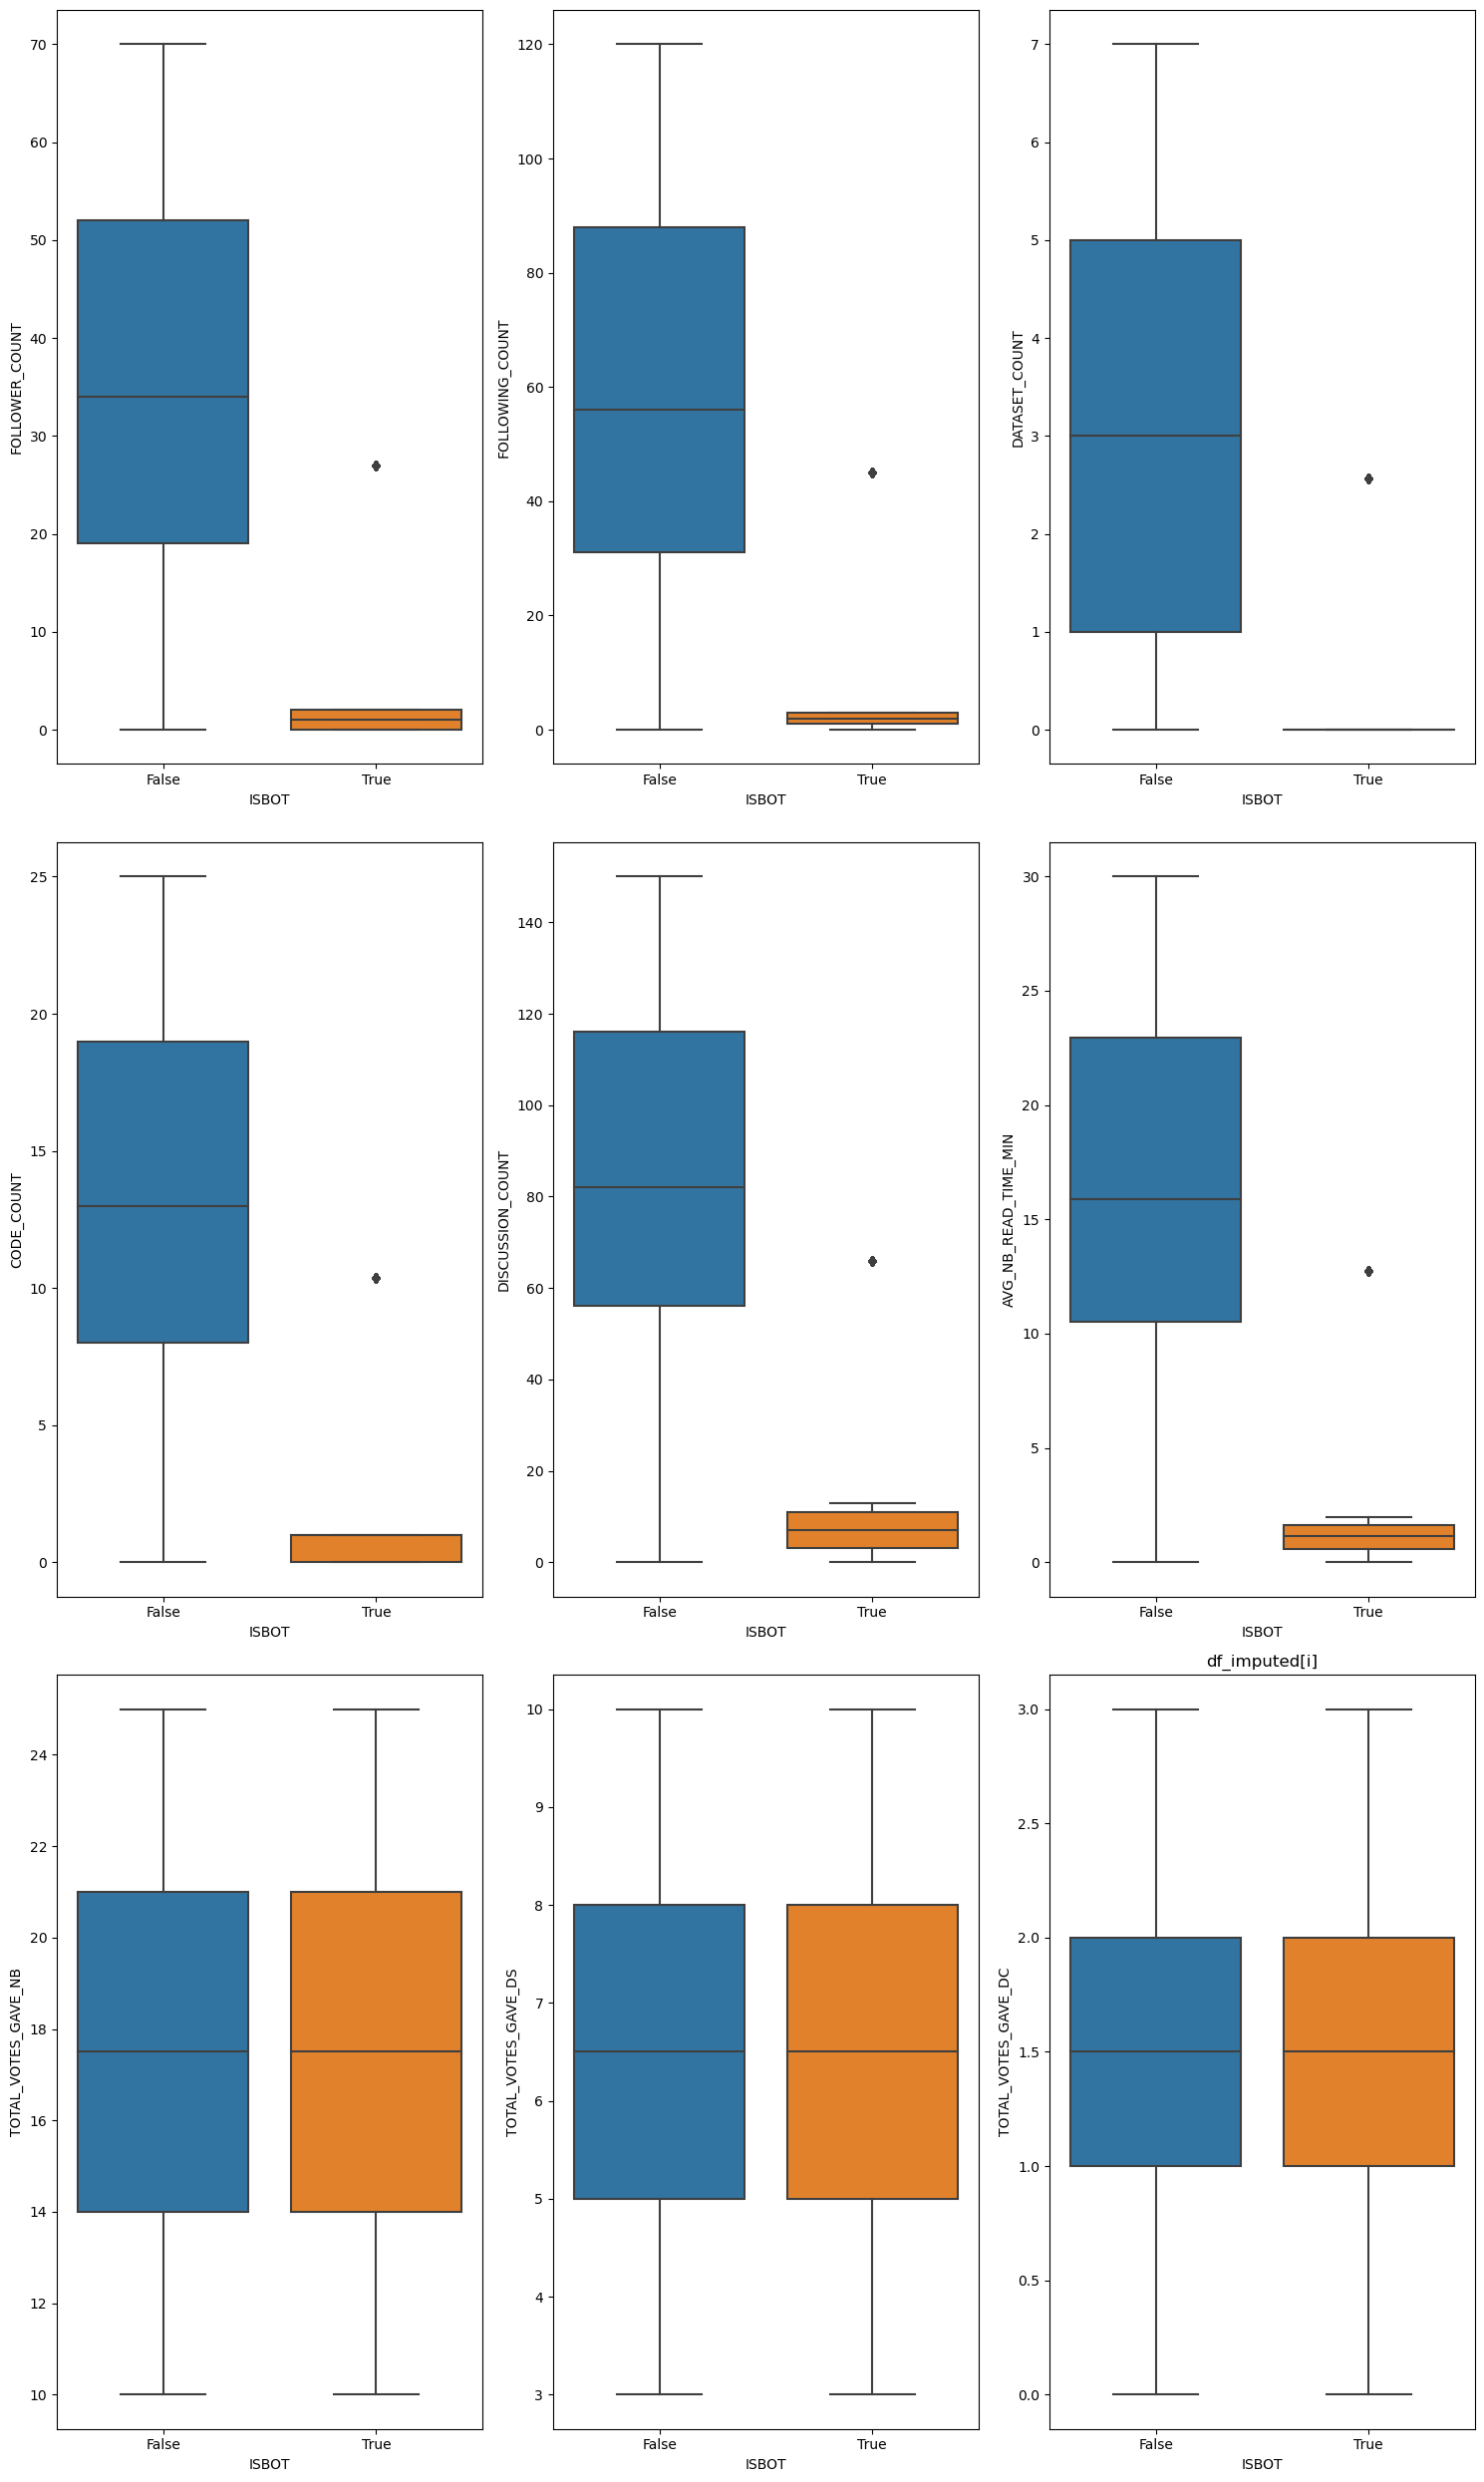

In [25]:
fig,ax=plt.subplots(3,3,figsize=(15,25))
for i,plo in zip(df_imputed.select_dtypes(include=np.number).columns,ax.flatten()):
    sns.boxplot(y=df_imputed[i],x=df_imputed['ISBOT'],ax=plo)
    plt.title('df_imputed[i]')
plt.tight_layout()
plt.show()

Check the dataset is balanced or imbalanced. If it is highly investigated, a different approach to balanced the dataset by using the correct technique

## Multi Collinearity check
 - Checking if the individual columns are correlated with each other. In which case, they might end up having the same predictive power or explaining the same variation in the dependent variable. 
 - The correlation matrix/ plot is a good way to establish multi collinearity between the dependent variables. Anything closer to +- 1 indicates high correlation between those two predictor variables.
 - We can observe from the plot that pelvic_incidence is highly correlated with pelvic tilt, sacral slope, degree spondylolisthesis and lumbar lordosis angle.

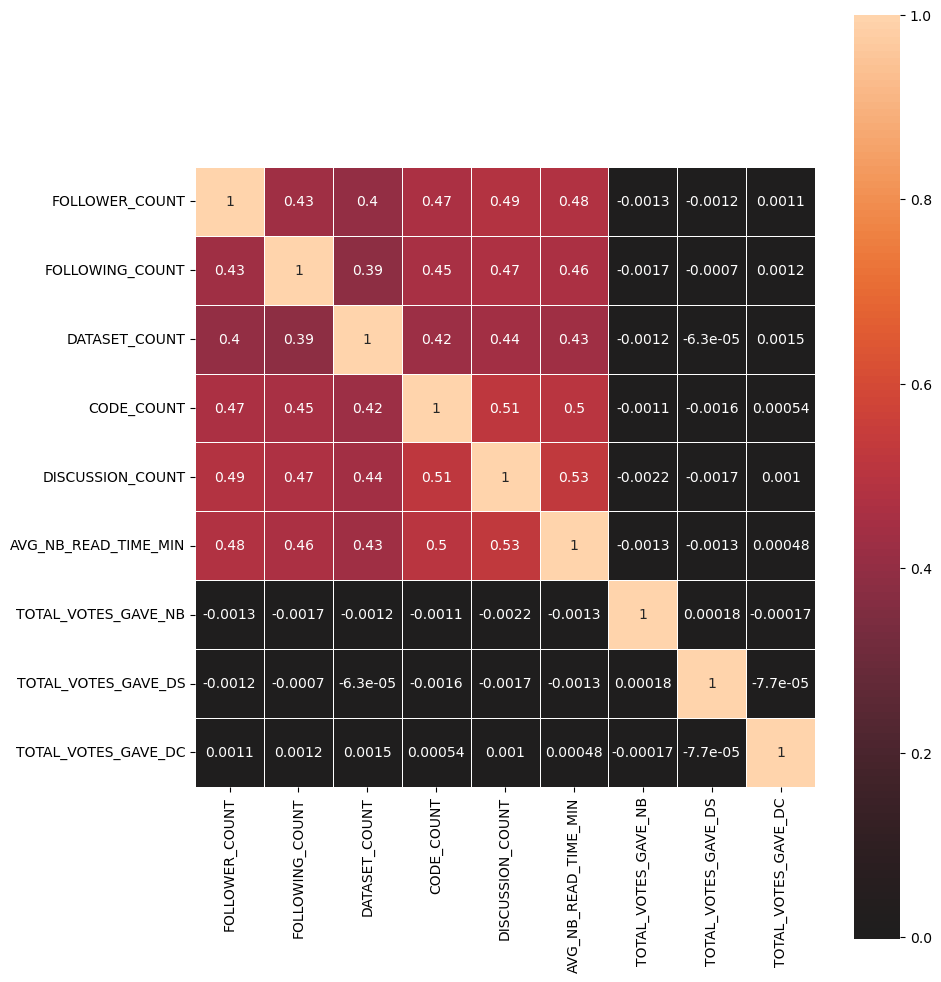

In [26]:
Data_imputed = df_imputed.corr()
# Generate the correlation plot 
plt.figure(figsize = [10,12])
sns.heatmap(Data_imputed, annot= True,center=0, square=True, linewidths=.5)

plt.show()

In [27]:
# Seeing the correlation values
Data_imputed

FOLLOWER_COUNT  FOLLOWING_COUNT  DATASET_COUNT  \
FOLLOWER_COUNT              1.000000         0.429222       0.397609   
FOLLOWING_COUNT             0.429222         1.000000       0.389198   
DATASET_COUNT               0.397609         0.389198       1.000000   
CODE_COUNT                  0.466058         0.454790       0.421578   
DISCUSSION_COUNT            0.485691         0.474263       0.439904   
AVG_NB_READ_TIME_MIN        0.475641         0.463718       0.431294   
TOTAL_VOTES_GAVE_NB        -0.001288        -0.001665      -0.001232   
TOTAL_VOTES_GAVE_DS        -0.001162        -0.000704      -0.000063   
TOTAL_VOTES_GAVE_DC         0.001094         0.001191       0.001507   

                      CODE_COUNT  DISCUSSION_COUNT  AVG_NB_READ_TIME_MIN  \
FOLLOWER_COUNT          0.466058          0.485691              0.475641   
FOLLOWING_COUNT         0.454790          0.474263              0.463718   
DATASET_COUNT           0.421578          0.439904              0.431294   
CODE_COUNT              1.000000          0.514600              0.503938   
DISCUSSION_COUNT        0.514600          1.000000              0.525313   
AVG_NB_READ_TIME_MIN    0.503938          0.525313              1.000000   
TOTAL_VOTES_GAVE_NB    -0.001068         -0.002163             -0.001305   
TOTAL_VOTES_GAVE_DS    -0.001649         -0.001651             -0.001281   
TOTAL_VOTES_GAVE_DC     0.000539          0.001036              0.000478   

                      TOTAL_VOTES_GAVE_NB  TOTAL_VOTES_GAVE_DS  \
FOLLOWER_COUNT                  -0.001288            -0.001162   
FOLLOWING_COUNT                 -0.001665            -0.000704   
DATASET_COUNT                   -0.001232            -0.000063   
CODE_COUNT                      -0.001068            -0.001649   
DISCUSSION_COUNT                -0.002163            -0.001651   
AVG_NB_READ_TIME_MIN            -0.001305            -0.001281   
TOTAL_VOTES_GAVE_NB              1.000000             0.000183   
TOTAL_VOTES_GAVE_DS              0.000183             1.000000   
TOTAL_VOTES_GAVE_DC             -0.000171            -0.000077   

                      TOTAL_VOTES_GAVE_DC  
FOLLOWER_COUNT                   0.001094  
FOLLOWING_COUNT                  0.001191  
DATASET_COUNT                    0.001507  
CODE_COUNT                       0.000539  
DISCUSSION_COUNT                 0.001036  
AVG_NB_READ_TIME_MIN             0.000478  
TOTAL_VOTES_GAVE_NB             -0.000171  
TOTAL_VOTES_GAVE_DS             -0.000077  
TOTAL_VOTES_GAVE_DC              1.000000

In [28]:
# There is multicorreation in the data but it is not very high. The columns which show such are 
#'FOLLOWER_COUNT', 'FOLLOWING_COUNT', 'DATASET_COUNT', 'CODE_COUNT','DISCUSSION_COUNT', 'AVG_NB_READ_TIME_MIN',

In [29]:
# Check for multi-collinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df_imputed[['FOLLOWER_COUNT', 'FOLLOWING_COUNT', 'DATASET_COUNT', 'CODE_COUNT', 
                'DISCUSSION_COUNT', 'AVG_NB_READ_TIME_MIN', 'TOTAL_VOTES_GAVE_NB', 
                'TOTAL_VOTES_GAVE_DS', 'TOTAL_VOTES_GAVE_DC']]

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
print(vif)

   VIF Factor              features
0    3.834902        FOLLOWER_COUNT
1    3.625056       FOLLOWING_COUNT
2    3.011233         DATASET_COUNT
3    4.462167            CODE_COUNT
4    5.304814      DISCUSSION_COUNT
5    4.913063  AVG_NB_READ_TIME_MIN
6    7.907254   TOTAL_VOTES_GAVE_NB
7    6.805439   TOTAL_VOTES_GAVE_DS
8    2.726787   TOTAL_VOTES_GAVE_DC


Inference: Some factors show high mutilcollieanrity in the data

Satistical Test (Chi2-Contingency for categorical columns)

In [30]:
vars_to_test = ['NAME', 'EMAIL_ID', 'REGISTRATION_IPV4', 'REGISTRATION_LOCATION','GENDER','IS_GLOGIN']
for var in vars_to_test:
    contingency_table = pd.crosstab(df_imputed[var], df_imputed['ISBOT'])
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    print("Variable:", var)
    print("Chi-Squared:", chi2)
    print("P-Value:", p)
    print('-------')
    if p < 0.05:
        print("Significant")
    else:
        print("Not significant")
    print('==============')

Variable: NAME
Chi-Squared: 1199670.7375445627
P-Value: 0.43858366667278015
-------
Not significant
Variable: EMAIL_ID
Chi-Squared: 602951.5290541365
P-Value: 0.5217152264413143
-------
Not significant
Variable: REGISTRATION_IPV4
Chi-Squared: 1242257.4872245062
P-Value: 0.5803969816094053
-------
Not significant
Variable: REGISTRATION_LOCATION
Chi-Squared: 223.8247893256127
P-Value: 0.7931162045076564
-------
Not significant
Variable: GENDER
Chi-Squared: 0.9214829547360459
P-Value: 0.3370858978247868
-------
Not significant
Variable: IS_GLOGIN
Chi-Squared: 233697.03749293758
P-Value: 0.0
-------
Significant


droping insignificant columns

In [31]:
df_st = df_imputed.drop((['NAME', 'EMAIL_ID', 'REGISTRATION_IPV4', 'REGISTRATION_LOCATION','GENDER']),axis=1)

Statistical Test (T-Test for numerical columns)

In [32]:
vars_to_test = ['FOLLOWER_COUNT', 'FOLLOWING_COUNT', 'DATASET_COUNT', 'CODE_COUNT',
       'DISCUSSION_COUNT', 'AVG_NB_READ_TIME_MIN', 'TOTAL_VOTES_GAVE_NB',
       'TOTAL_VOTES_GAVE_DS', 'TOTAL_VOTES_GAVE_DC']
for var in vars_to_test:
    ISBOT = df_st[df_st['ISBOT'] == 1][var]
    NOT_BOT = df_st[df_st['ISBOT'] == 0][var]
    t, p = stats.ttest_ind(ISBOT, NOT_BOT, equal_var=False)
    print("Variable:", var)
    print("T-Statistic:", t)
    print("P-Value:", p)
    print('------')
    if p < 0.05:
        print("Significant")
    else:
        print("Not significant")
    print('==================')

Variable: FOLLOWER_COUNT
T-Statistic: -1459.7660335594767
P-Value: 0.0
------
Significant
Variable: FOLLOWING_COUNT
T-Statistic: -1413.8396814202351
P-Value: 0.0
------
Significant
Variable: DATASET_COUNT
T-Statistic: -1284.01195040056
P-Value: 0.0
------
Significant
Variable: CODE_COUNT
T-Statistic: -1574.5195431994832
P-Value: 0.0
------
Significant
Variable: DISCUSSION_COUNT
T-Statistic: -1662.8449221708074
P-Value: 0.0
------
Significant
Variable: AVG_NB_READ_TIME_MIN
T-Statistic: -1619.3953260550868
P-Value: 0.0
------
Significant
Variable: TOTAL_VOTES_GAVE_NB
T-Statistic: 1.9512852943732906
P-Value: 0.05102360351132055
------
Not significant
Variable: TOTAL_VOTES_GAVE_DS
T-Statistic: 1.7945613508855622
P-Value: 0.07272414244436032
------
Not significant
Variable: TOTAL_VOTES_GAVE_DC
T-Statistic: -1.2255143379121252
P-Value: 0.22038199450750082
------
Not significant


Inference: We have found all the columns which are significant(7) from the satistical test.

### Encode the dataframe using n-1 dummy encoding

#### Final processing

 - For modelling purpose, we map all the predictor variables to a array X and the target variable to an array Y. 
 - The class labels 'True' and 'False' are numerically encoded to 1 and 0. While this is not necessary as the sklearn module can handle it internally, it is convenient for graphing the Receiver Operating curve (if required).
 - The variables are subjected to Standardization (mean zero and unit variance) before being fed to the model.

In [33]:
df_gd = pd.get_dummies(df_st,drop_first=True)

In [34]:
df_gd.head()

FOLLOWER_COUNT  FOLLOWING_COUNT  DATASET_COUNT  CODE_COUNT  \
0            53.0             87.0            5.0    3.000000   
1            16.0             67.0            5.0   10.384503   
2            44.0             81.0            4.0   17.000000   
3            23.0            114.0            5.0   24.000000   
4            46.0            112.0            2.0   12.000000   

   DISCUSSION_COUNT  AVG_NB_READ_TIME_MIN  TOTAL_VOTES_GAVE_NB  \
0             124.0             12.742246                 16.0   
1              26.0             24.970000                 14.0   
2             125.0              7.750000                 16.0   
3              67.0             13.400000                 21.0   
4              63.0             24.830000                 10.0   

   TOTAL_VOTES_GAVE_DS  TOTAL_VOTES_GAVE_DC  IS_GLOGIN_True  ISBOT_True  
0                 10.0                  3.0               0           0  
1                  5.0                  2.0               1           0  
2                  4.0                  0.0               1           0  
3                 10.0                  1.0               1           0  
4                  6.0                  2.0               0           0

## Modelling and Feature Interpretation
 - Build Base model of stats model of Logistic regression with a train test split in a 70:30 ratio.
 - Implementing a logistic regression classifier  
 - To check model when applied on the test data returns an accuracy,precision,recall,auc score. 

In [35]:

#For Base-model we use stats model 
X = df_gd.drop('ISBOT_True',axis=1)
y = df_gd['ISBOT_True'].astype('int')
X = sm.add_constant(X) # adding constant

smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

#Train Test Split in 70:30 with random_state = 42
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=42)
print(X_train.shape,
      X_test.shape,
      y_train.shape,
      y_test.shape)

(1383611, 11) (592977, 11) (1383611,) (592977,)


### Building a Base model

In [36]:
base_model = sm.Logit(y_train,X_train).fit()
base_model.summary()

         Current function value: 0.060042
         Iterations: 35


C:\Users\Sahil\anaconda03\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             ISBOT_True   No. Observations:              1383611
Model:                          Logit   Df Residuals:                  1383600
Method:                           MLE   Df Model:                           10
Date:                Wed, 12 Apr 2023   Pseudo R-squ.:                  0.9134
Time:                        07:49:21   Log-Likelihood:                -83075.
converged:                      False   LL-Null:                   -9.5905e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    5.1839      0.039    133.317      0.000       5.108       5.260
FOLLOWER_COUNT          -0.0570      0.001    -90.179      0.000      -0.058      -0.056
FOLLOWING_COUNT         -0.0329      0.000    -87.152      0.000      -0.034      -0.032
DATASET_COUNT           -0.5135      0.006    -79.445      0.000      -0.526      -0.501
CODE_COUNT              -0.1588      0.002    -96.306      0.000      -0.162      -0.156
DISCUSSION_COUNT        -0.0272      0.000    -99.840      0.000      -0.028      -0.027
AVG_NB_READ_TIME_MIN    -0.1355      0.001    -97.941      0.000      -0.138      -0.133
TOTAL_VOTES_GAVE_NB     -0.0004      0.002     -0.252      0.801      -0.004       0.003
TOTAL_VOTES_GAVE_DS      0.0008      0.003      0.234      0.815      -0.006       0.007
TOTAL_VOTES_GAVE_DC      0.0030      0.007      0.437      0.662      -0.010       0.016
IS_GLOGIN_True         -47.5548   3.42e+08  -1.39e-07      1.000    -6.7e+08     6.7e+08
========================================================================================

Possibly complete quasi-separation: A fraction 0.29 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

Note: P_value must be less than 0.05 for a variable to be significant, we drop and see the model performance 

In [37]:
# Get the p-values for each coefficient
base_model.pvalues<0.06

const                    True
FOLLOWER_COUNT           True
FOLLOWING_COUNT          True
DATASET_COUNT            True
CODE_COUNT               True
DISCUSSION_COUNT         True
AVG_NB_READ_TIME_MIN     True
TOTAL_VOTES_GAVE_NB     False
TOTAL_VOTES_GAVE_DS     False
TOTAL_VOTES_GAVE_DC     False
IS_GLOGIN_True          False
dtype: bool

Inference: Here we can affirm that Total votes does not help us to determine if the account is a bot, nor columns like GENDER,GLOGIN,TOTAL_VOTES_GAVE

### Base_model 2 with removing the less p-value variables

In [38]:
X = df_st[['FOLLOWER_COUNT', 'FOLLOWING_COUNT', 'DATASET_COUNT', 'CODE_COUNT',
       'DISCUSSION_COUNT', 'AVG_NB_READ_TIME_MIN']]
y  = df_st['ISBOT'].astype('int')
X= sm.add_constant(X)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=42)
print(X_train.shape,
      X_test.shape,
      y_train.shape,
      y_test.shape)

(924831, 7) (396357, 7) (924831,) (396357,)


In [39]:
base_model2 = sm.Logit(y_train,X_train).fit()
base_model2.summary()

Optimization terminated successfully.
         Current function value: 0.070662
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  ISBOT   No. Observations:               924831
Model:                          Logit   Df Residuals:                   924824
Method:                           MLE   Df Model:                            6
Date:                Wed, 12 Apr 2023   Pseudo R-squ.:                  0.8748
Time:                        07:49:24   Log-Likelihood:                -65351.
converged:                       True   LL-Null:                   -5.2209e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    3.9681      0.012    344.976      0.000       3.946       3.991
FOLLOWER_COUNT          -0.0553      0.001    -76.663      0.000      -0.057      -0.054
FOLLOWING_COUNT         -0.0318      0.000    -74.062      0.000      -0.033      -0.031
DATASET_COUNT           -0.4826      0.007    -66.569      0.000      -0.497      -0.468
CODE_COUNT              -0.1547      0.002    -82.357      0.000      -0.158      -0.151
DISCUSSION_COUNT        -0.0266      0.000    -85.801      0.000      -0.027      -0.026
AVG_NB_READ_TIME_MIN    -0.1322      0.002    -83.867      0.000      -0.135      -0.129
========================================================================================

Possibly complete quasi-separation: A fraction 0.26 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

### Define functions to get_classification_report,plot_confusion_matrix and plot_roc_curve

classification report for train and test data

In [40]:
# create a generalized function to calculate the metrics values for test set
def get_train_report(model):
    
    # for test set:
    # test_pred: prediction made by the model on the test dataset 'X_test'
    # y_test: actual values of the target variable for the test dataset

    # predict the output of the target variable from the test data 
    train_pred = model.predict(X_train)

    # return the classification report for test data
    return(classification_report(y_train, train_pred))




# create a generalized function to calculate the metrics values for test set
def get_test_report(model):
    
    # for test set:
    # test_pred: prediction made by the model on the test dataset 'X_test'
    # y_test: actual values of the target variable for the test dataset

    # predict the output of the target variable from the test data 
    test_pred = model.predict(X_val)

    # return the classification report for test data
    return(classification_report(y_val, test_pred))

confusion matrix

In [41]:
def plot_confusion_matrix(model):
    y_pred = model.predict(X_val)
    
    # create a confusion matrix
    # pass the actual and predicted target values to the confusion_matrix()
    cm = confusion_matrix(y_val, y_pred)

    # label the confusion matrix  
    # pass the matrix as 'data'
    # pass the required column names to the parameter, 'columns'
    # pass the required row names to the parameter, 'index'
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

    # plot a heatmap to visualize the confusion matrix
    # 'annot' prints the value of each grid 
    # 'fmt = d' returns the integer value in each grid
    # 'cmap' assigns color to each grid
    # as we do not require different colors for each grid in the heatmap,
    # use 'ListedColormap' to assign the specified color to the grid
    # 'cbar = False' will not return the color bar to the right side of the heatmap
    # 'linewidths' assigns the width to the line that divides each grid
    # 'annot_kws = {'size':25})' assigns the font size of the annotated text 
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})

    # set the font size of x-axis ticks using 'fontsize'
    plt.xticks(fontsize = 20)

    # set the font size of y-axis ticks using 'fontsize'
    plt.yticks(fontsize = 20)

    # display the plot
    plt.show()

plot roc curve and show auc score on the plot

In [42]:
def plot_roc(model):
    y_pred_prob = model.predict_proba(X_val)[:,1]
    
    # the roc_curve() returns the values for false positive rate, true positive rate and threshold
    # pass the actual target values and predicted probabilities to the function
    fpr, tpr, thresholds = roc_curve(y_val, y_pred_prob)

    # plot the ROC curve
    plt.plot(fpr, tpr)

    # set limits for x and y axes
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    # plot the straight line showing worst prediction for the model
    plt.plot([0, 1], [0, 1],'r--')

    # add plot and axes labels
    # set text size using 'fontsize'
    plt.title('ROC curve for Admission Prediction Classifier', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

    # add the AUC score to the plot
    # 'x' and 'y' gives position of the text
    # 's' is the text 
    # use round() to round-off the AUC score upto 4 digits
    plt.text(x = 0.82, y = 0.3, s = ('AUC Score:',round(roc_auc_score(y_val, y_pred_prob),4)))

    # plot the grid
    plt.grid(True)

### KFolds Cross Validation for Logistic Regression,Decision Tree and XGBoost Models

In [43]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score

X = df_gd.drop('ISBOT_True',axis=1)
y = df_gd['ISBOT_True'].astype('int')

smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

# Define the number of folds for cross-validation
k = 10

# Initialize the evaluation metrics
lr_acc_scores = []
lr_prec_scores = []
lr_rec_scores = []
dt_acc_scores = []
dt_prec_scores = []
dt_rec_scores = []
rf_acc_scores = []
rf_prec_scores = []
rf_rec_scores = []
xgb_acc_scores = []
xgb_prec_scores = []
xgb_rec_scores = []

# Initialize the cross-validation splitter
cv = StratifiedKFold(n_splits=k)

# Train and evaluate the models using k-fold cross-validation
for train_idx, val_idx in cv.split(X, y):
    # Split the data into training and validation sets
    X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
    X_val, y_val = X.iloc[val_idx], y.iloc[val_idx]
    
    # Fit the logistic regression model on the training set
    lr_model = LogisticRegression()
    lr_model.fit(X_train, y_train)
    
    # Evaluate the logistic regression model on the validation set
    y_pred = lr_model.predict(X_val)
    lr_acc_scores.append(accuracy_score(y_val, y_pred))
    lr_prec_scores.append(precision_score(y_val, y_pred))
    lr_rec_scores.append(recall_score(y_val, y_pred))
    
    # Fit the decision tree model on the training set
    dt_model = DecisionTreeClassifier()
    dt_model.fit(X_train, y_train)
    
    # Evaluate the decision tree model on the validation set
    y_pred = dt_model.predict(X_val)
    dt_acc_scores.append(accuracy_score(y_val, y_pred))
    dt_prec_scores.append(precision_score(y_val, y_pred))
    dt_rec_scores.append(recall_score(y_val, y_pred))
    
    # Fit the random forest model on the training set
    rf_model = RandomForestClassifier()
    rf_model.fit(X_train, y_train)
    
    # Evaluate the random forest model on the validation set
    y_pred = rf_model.predict(X_val)
    rf_acc_scores.append(accuracy_score(y_val, y_pred))
    rf_prec_scores.append(precision_score(y_val, y_pred))
    rf_rec_scores.append(recall_score(y_val, y_pred))
    
    # Fit the XGBoost model on the training set
    xgb_model = xgb.XGBClassifier()
    xgb_model.fit(X_train, y_train)
    
    # Evaluate the XGBoost model on the validation set
    y_pred = xgb_model.predict(X_val)
    xgb_acc_scores.append(accuracy_score(y_val, y_pred))
    xgb_prec_scores.append(precision_score(y_val, y_pred))
    xgb_rec_scores.append(recall_score(y_val, y_pred))

# Average the evaluation metrics across all folds
lr_mean_acc = sum(lr_acc_scores) / k
lr_mean_prec = sum(lr_prec_scores) / k
lr_mean_rec = sum(lr_rec_scores) / k

# Average the evaluation metrics across all folds
dt_mean_acc = sum(dt_acc_scores) / k
dt_mean_prec = sum(dt_prec_scores) / k
dt_mean_rec = sum(dt_rec_scores) / k

# Average the evaluation metrics across all folds
rf_mean_acc = sum(rf_acc_scores) / k
rf_mean_prec = sum(rf_prec_scores) / k
rf_mean_rec = sum(rf_rec_scores) / k

# Average the evaluation metrics across all folds
xgb_mean_acc = sum(xgb_acc_scores) / k
xgb_mean_prec = sum(xgb_prec_scores) / k
xgb_mean_rec = sum(xgb_rec_scores) / k

print('LOGISTIC REGRESSION MODEL')
print('Accuracy: {:.2f}'.format(lr_mean_acc))
print('Precision: {:.2f}'.format(lr_mean_prec))
print('Recall: {:.2f}'.format(lr_mean_rec))

print('DECISION TREE MODEL')
print('Accuracy: {:.2f}'.format(dt_mean_acc))
print('Precision: {:.2f}'.format(dt_mean_prec))
print('Recall: {:.2f}'.format(dt_mean_rec))

print('RANDOM FOREST MODEL')
print('Accuracy: {:.2f}'.format(rf_mean_acc))
print('Precision: {:.2f}'.format(rf_mean_prec))
print('Recall: {:.2f}'.format(rf_mean_rec))

print("XGBOOST MODEL")
print('Accuracy: {:.2f}'.format(xgb_mean_acc))
print('Precision: {:.2f}'.format(xgb_mean_prec))
print('Recall: {:.2f}'.format(xgb_mean_rec))

LOGISTIC REGRESSION MODEL
Accuracy: 0.99
Precision: 0.98
Recall: 1.00
DECISION TREE MODEL
Accuracy: 0.97
Precision: 0.98
Recall: 0.97
RANDOM FOREST MODEL
Accuracy: 0.99
Precision: 0.98
Recall: 1.00
XGBOOST MODEL
Accuracy: 0.99
Precision: 0.98
Recall: 1.00


Here we find the Accuracy,Precision and Recall for all the models
-LOGISTIC REGRESSION MODEL
Accuracy: 0.99
Precision: 0.98
Recall: 1.00

-DECISION TREE MODEL
Accuracy: 0.98
Precision: 0.98
Recall: 0.97
    
-RANDOM FOREST MODEL
Accuracy: 0.99
Precision: 0.98
Recall: 1.00
    
-XGBOOST MODEL
Accuracy: 0.99
Precision: 0.98
Recall: 1.00

Train-Test report for Logistic Regression, confusion matrix and roc curve with auc score

### Logistic Regression Model using sklearn

In [44]:
Train_Report = get_train_report(lr_model)
print(Train_Report)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    889465
           1       0.98      1.00      0.99    889465

    accuracy                           0.99   1778930
   macro avg       0.99      0.99      0.99   1778930
weighted avg       0.99      0.99      0.99   1778930



In [45]:
Test_Report = get_test_report(lr_model)
print(Test_Report)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     98829
           1       0.98      1.00      0.99     98829

    accuracy                           0.99    197658
   macro avg       0.99      0.99      0.99    197658
weighted avg       0.99      0.99      0.99    197658



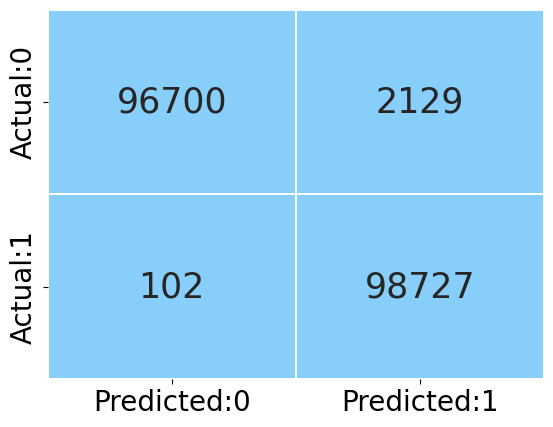

In [46]:
plot_confusion_matrix(lr_model)

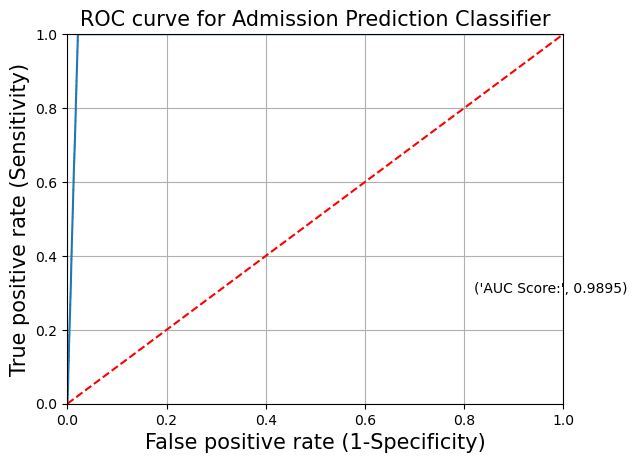

In [47]:
plot_roc(lr_model)

The AUC score is 9893 for unscaled Logistic Regression model

### Decision Tree Model

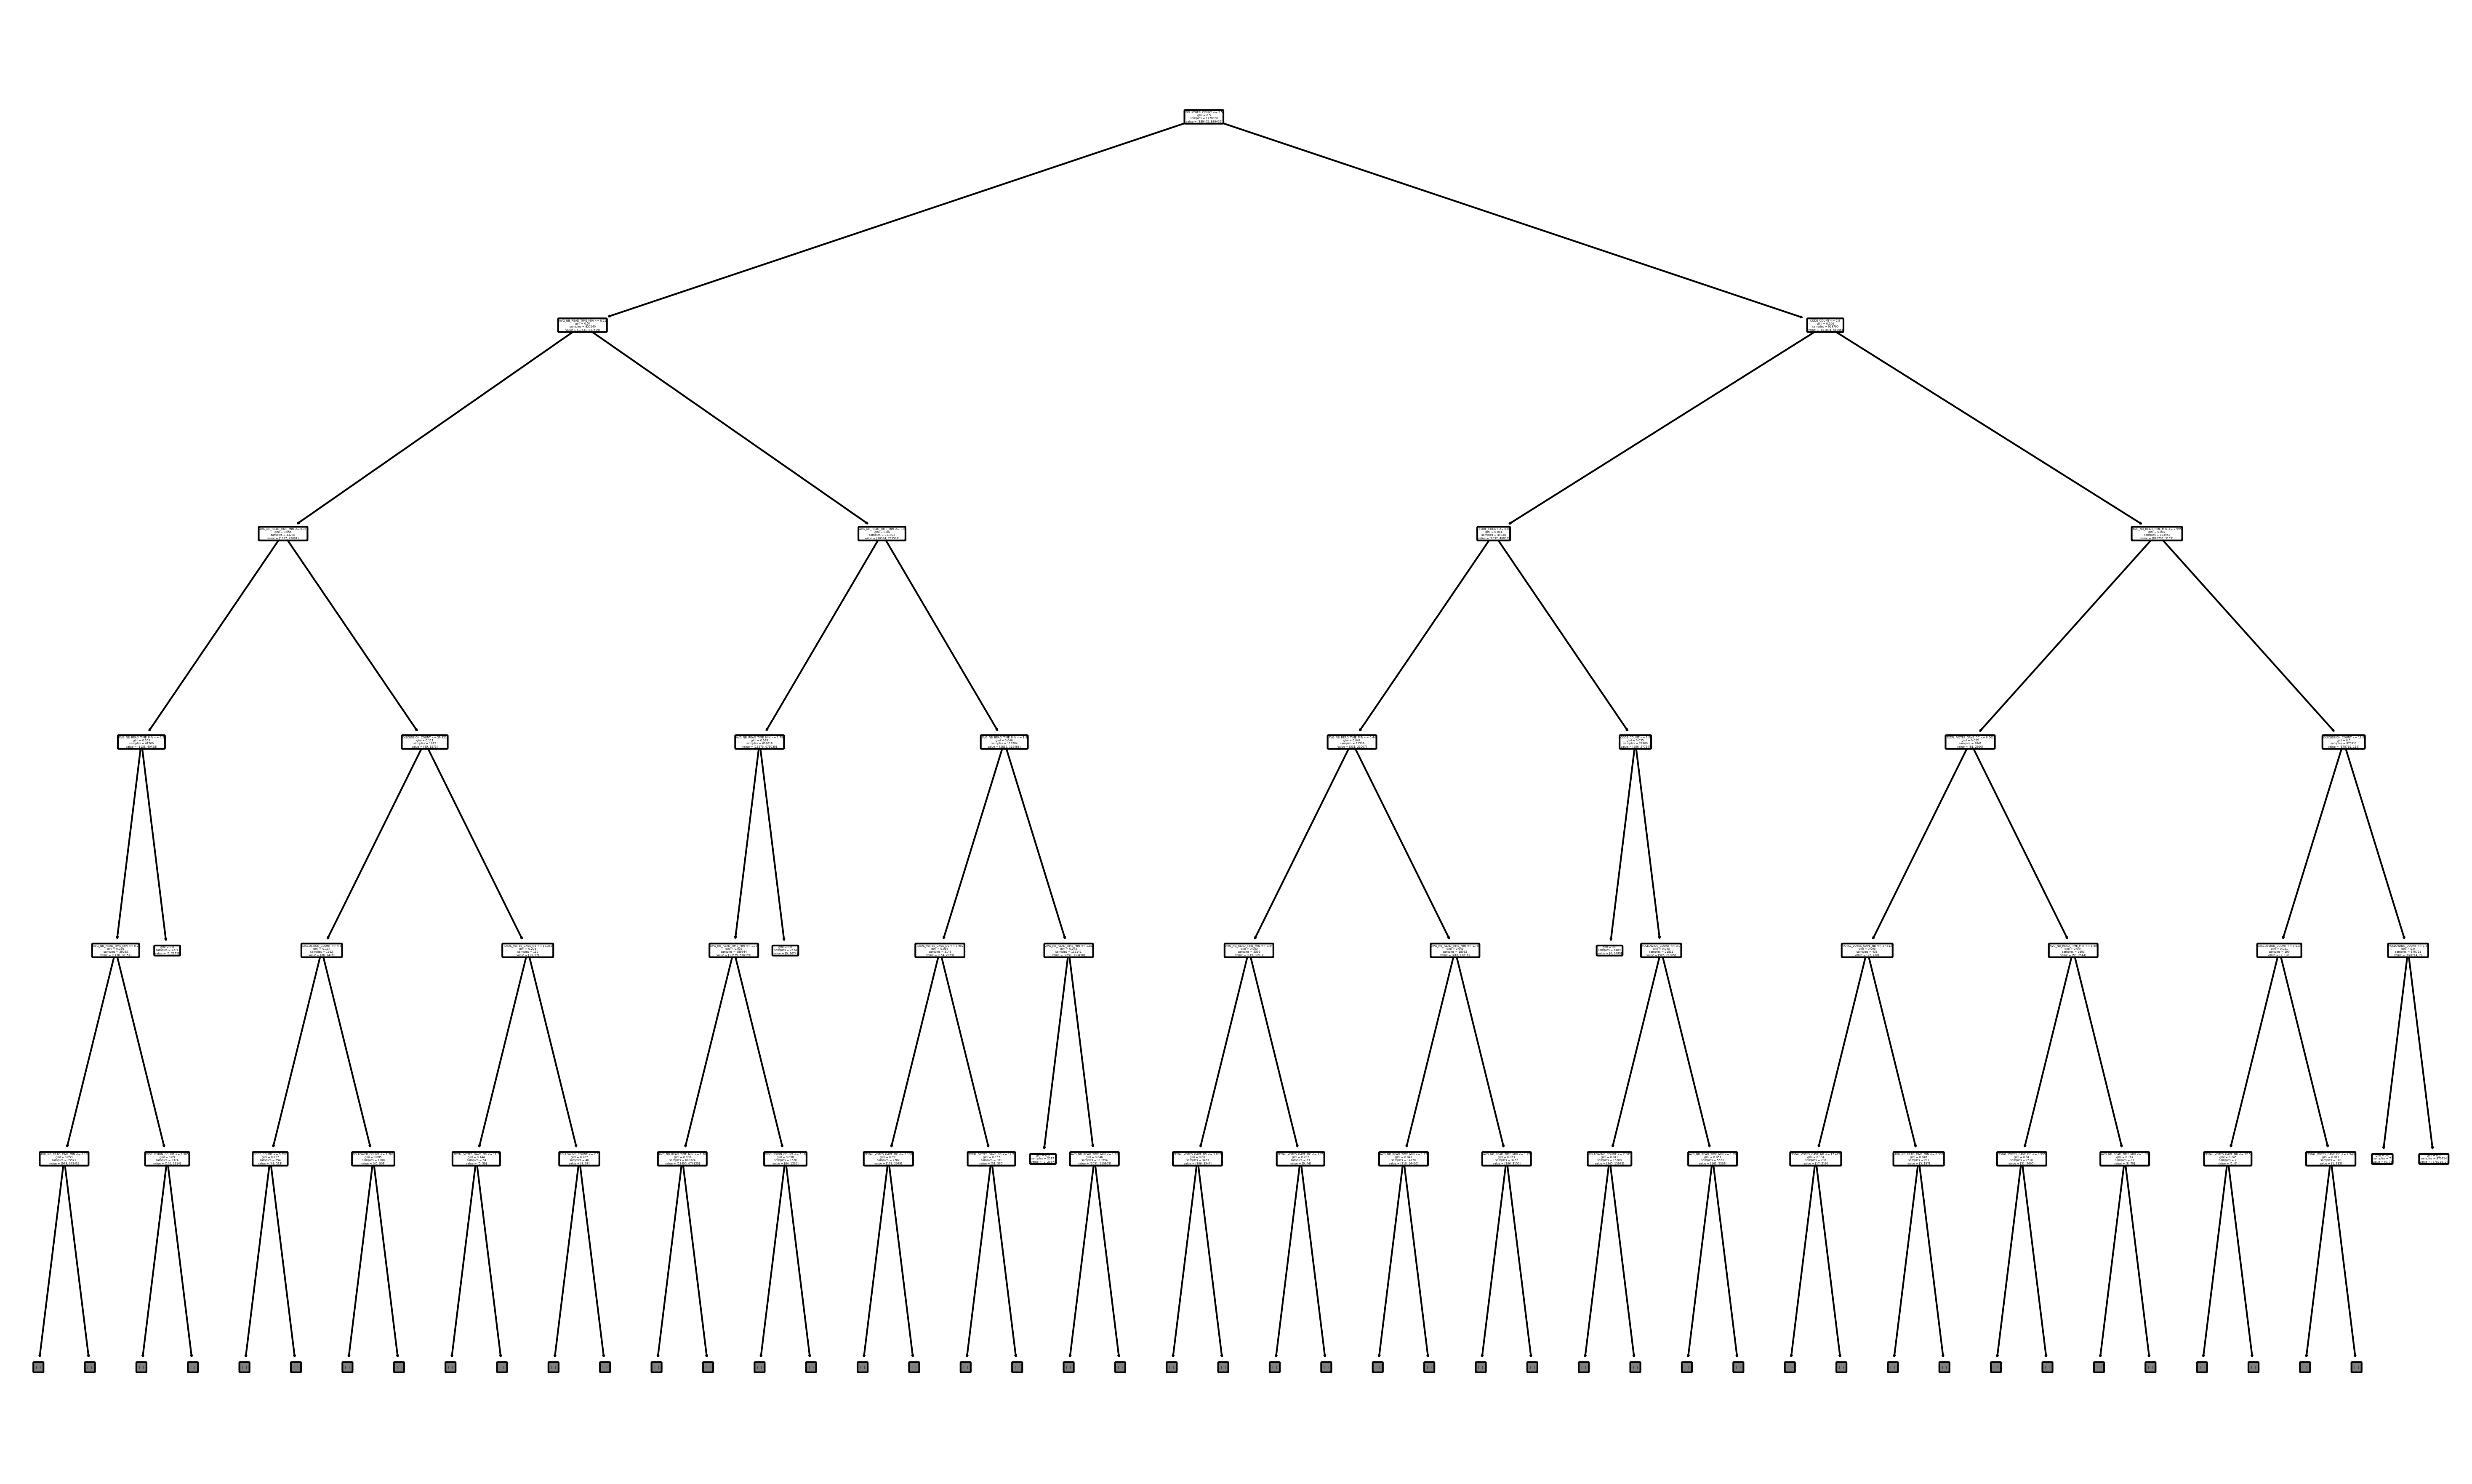

In [48]:
plt.figure(figsize=(25,15),dpi=300)
tree.plot_tree(dt_model,max_depth=5,feature_names=X_train.columns,rounded=True)
plt.show()

In [49]:
train_report = get_train_report(dt_model)

# print the performance measures
print(train_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    889465
           1       1.00      1.00      1.00    889465

    accuracy                           1.00   1778930
   macro avg       1.00      1.00      1.00   1778930
weighted avg       1.00      1.00      1.00   1778930



In [50]:
test_report = get_test_report(dt_model)

# print the performance measures
print(test_report)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     98829
           1       0.98      1.00      0.99     98829

    accuracy                           0.99    197658
   macro avg       0.99      0.99      0.99    197658
weighted avg       0.99      0.99      0.99    197658



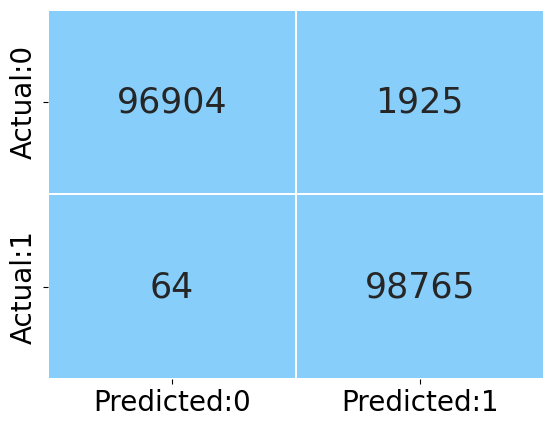

In [51]:
plot_confusion_matrix(dt_model)

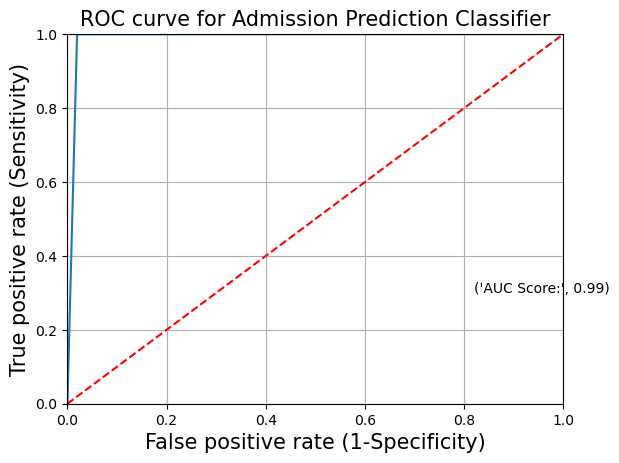

In [52]:
plot_roc(dt_model)

**Interpretation:** The red dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).<br>
From the above plot, we can see that the stacking model is away from the dotted line; with the AUC score 0.9866.

<AxesSubplot:xlabel='Importance', ylabel='Features'>

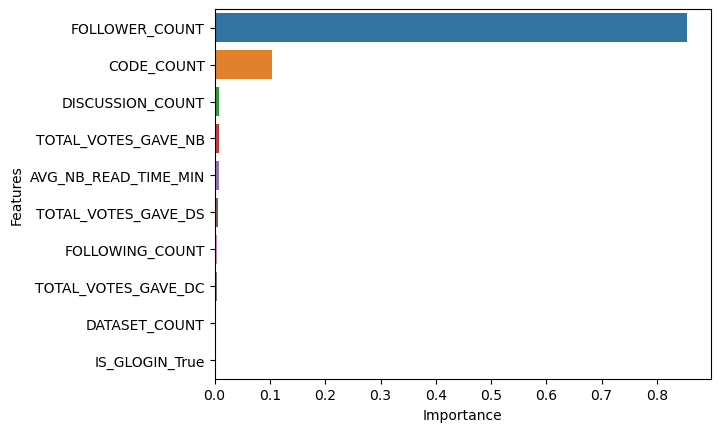

In [53]:
important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': dt_model.feature_importances_})

# sort the dataframe in the descending order according to the feature importance
important_features = important_features.sort_values('Importance', ascending = False)

# create a barplot to visualize the features based on their importance
sns.barplot(x = 'Importance', y = 'Features', data = important_features)

# add plot and axes labels
# set text size

### Random Forest Model

In [54]:
train_report = get_train_report(rf_model)

# print the performace measures
print(train_report) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    889465
           1       1.00      1.00      1.00    889465

    accuracy                           1.00   1778930
   macro avg       1.00      1.00      1.00   1778930
weighted avg       1.00      1.00      1.00   1778930



In [55]:
test_report = get_test_report(rf_model)

# print the performace measures
print(test_report)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     98829
           1       0.98      1.00      0.99     98829

    accuracy                           0.99    197658
   macro avg       0.99      0.99      0.99    197658
weighted avg       0.99      0.99      0.99    197658



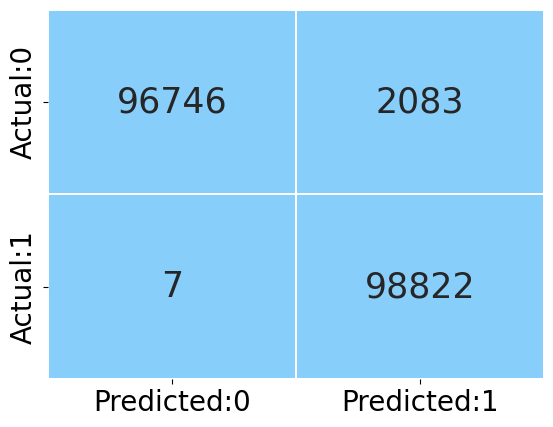

In [56]:
plot_confusion_matrix(rf_model)

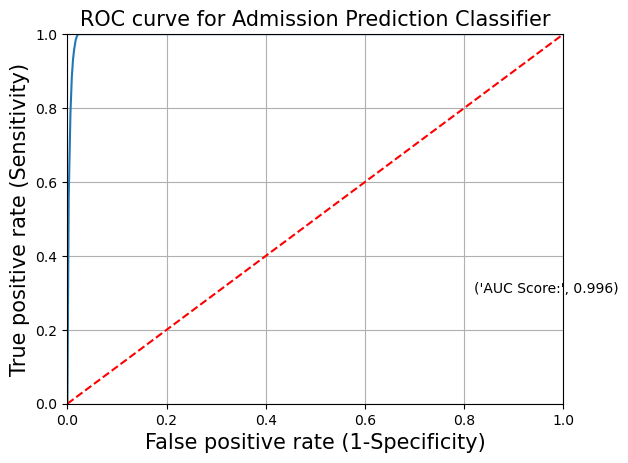

In [57]:
plot_roc(rf_model)

**Interpretation:** The red dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).<br>
From the above plot, we can see that the stacking model is away from the dotted line; with the AUC score 0.9957.

<AxesSubplot:xlabel='Importance', ylabel='Features'>

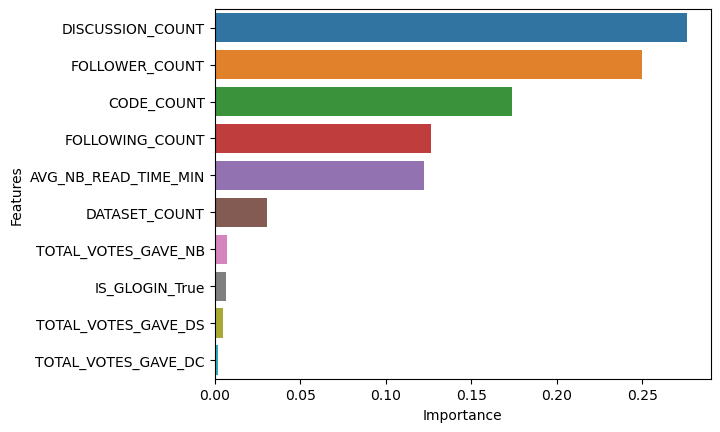

In [58]:
important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': rf_model.feature_importances_})

# sort the dataframe in the descending order according to the feature importance
important_features = important_features.sort_values('Importance', ascending = False)

# create a barplot to visualize the features based on their importance
sns.barplot(x = 'Importance', y = 'Features', data = important_features)

# add plot and axes labels
# set text size

### XGBoost model

In [59]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(max_depth = 10, gamma = 1)

# fit the model using fit() on train data
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [60]:
train_report = get_train_report(xgb_model)

# print the performance measures
print(train_report)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    889465
           1       0.98      1.00      0.99    889465

    accuracy                           0.99   1778930
   macro avg       0.99      0.99      0.99   1778930
weighted avg       0.99      0.99      0.99   1778930



In [61]:
test_report = get_test_report(xgb_model)

# print the performance measures
print(test_report)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     98829
           1       0.98      1.00      0.99     98829

    accuracy                           0.99    197658
   macro avg       0.99      0.99      0.99    197658
weighted avg       0.99      0.99      0.99    197658



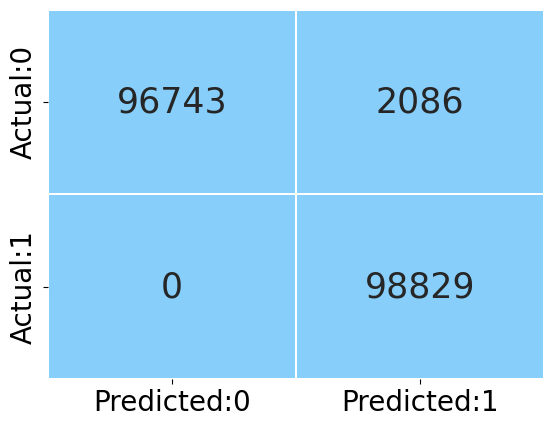

In [62]:
plot_confusion_matrix(xgb_model)

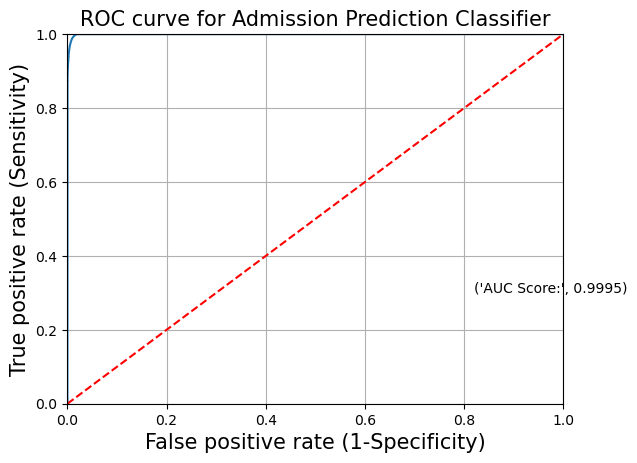

In [63]:
plot_roc(xgb_model)

**Interpretation:** The red dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).<br>
From the above plot, we can see that the stacking model is away from the dotted line; with the AUC score 0.9995.

<AxesSubplot:xlabel='Importance', ylabel='Features'>

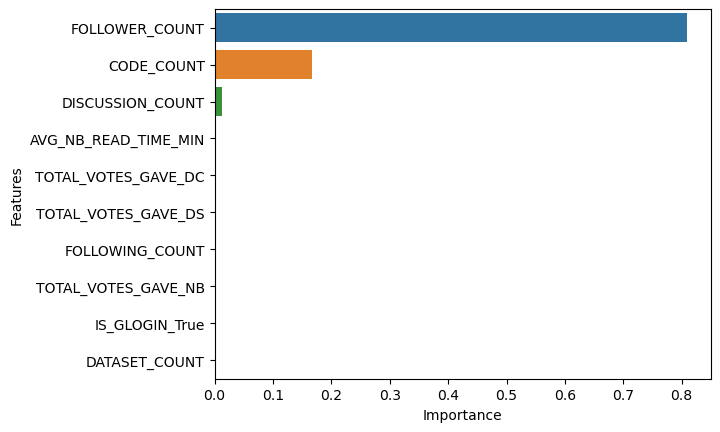

In [64]:
important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': xgb_model.feature_importances_})

# sort the dataframe in the descending order according to the feature importance
important_features = important_features.sort_values('Importance', ascending = False)

# create a barplot to visualize the features based on their importance
sns.barplot(x = 'Importance', y = 'Features', data = important_features)

# add plot and axes labels
# set text size

### Hyper Parameter Tuning

please keep it commented

In [65]:
### Decision Tree Hyper Tunned

In [66]:
# # create a dictionary with hyperparameters and its values
# # pass the criteria 'entropy' and 'gini' to the parameter, 'criterion' 
# # pass the range of values to 'max_depth' that assigns maximum depth of the tree
# # 'max_features' assigns maximum number of features to consider for the best split. We pass the string 'sqrt' and 'log2'
# # 'sqrt' considers maximum number of features equal to the square root of total features
# # 'log2' considers maximum number of features equal to the log of total features with base 2
# # pass the range of values to 'min_samples_split' that assigns minimum number of samples to split an internal node
# # pass the range of values to 'min_samples_leaf' that assigns minimum number of samples required at the terminal/leaf node
# # pass the range of values to 'max_leaf_nodes' that assigns maximum number of leaf nodes in the tree
# tuned_paramaters = [{'criterion': ['entropy', 'gini'], 
#                      'max_depth': range(2, 6),
#                      'max_features': ["sqrt", "log2"],
#                      'min_samples_split': range(2,6),
#                      'min_samples_leaf': range(1,6),
#                      'max_leaf_nodes': range(1, 6)}]
 
# # instantiate the 'DecisionTreeClassifier' 
# # pass the 'random_state' to obtain the same samples for each time you run the code
# decision_tree_classification = DecisionTreeClassifier(random_state = 42)

# # use GridSearchCV() to find the optimal value of the hyperparameters
# # estimator: pass the decision tree classifier model
# # param_grid: pass the list 'tuned_parameters'
# # cv: number of folds in k-fold i.e. here cv = 5
# tree_grid = GridSearchCV(estimator = decision_tree_classification, 
#                          param_grid = tuned_paramaters, 
#                          cv = 5)

# # fit the model on X_train and y_train using fit()
# tree_grid_model = tree_grid.fit(X_train, y_train)

# # get the best parameters
# print('Best parameters for decision tree classifier: ', tree_grid_model.best_params_, '\n')

Best parameters for decision tree classifier:  {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'max_leaf_nodes': 5, 'min_samples_leaf': 1, 'min_samples_split': 2} 

In [67]:
# dt_model = DecisionTreeClassifier(criterion = 'gini',
#                                   max_depth = 4,
#                                   max_features = 'sqrt',
#                                   max_leaf_nodes = 5,
#                                   min_samples_leaf = 1,
#                                   min_samples_split = 2,
#                                   random_state = 42)

# # use fit() to fit the model on the train set
# dt_model = dt_model.fit(X_train, y_train)

In [68]:
# tree.plot_tree(decision_tree,feature_names=X_train.columns,rounded=True)
# plt.show()

In [69]:
# print('Classification Report for train set: \n', get_train_report(dt_model))

In [70]:
# print('Classification Report for test set: \n', get_test_report(dt_model))

In [71]:
# plot_confusion_matrix(dt_model)

In [72]:
# plot_roc(dt_model)

In [73]:
# Random Forest Hyper Tunned

In [74]:
# tuned_paramaters = [{'criterion': ['entropy', 'gini'],
#                      'n_estimators': [10, 30, 50, 70, 90],
#                      'max_depth': [10, 15, 20],
#                      'max_features': ['sqrt', 'log2'],
#                      'min_samples_split': [2, 5, 8, 11],
#                      'min_samples_leaf': [1, 5, 9],
#                      'max_leaf_nodes': [2, 5, 8, 11]}]
 
# # instantiate the 'RandomForestClassifier' 
# # pass the 'random_state' to obtain the same samples for each time you run the code
# random_forest_classification = RandomForestClassifier(random_state = 10)

# # use GridSearchCV() to find the optimal value of the hyperparameters
# # estimator: pass the random forest classifier model
# # param_grid: pass the list 'tuned_parameters'
# # cv: number of folds in k-fold i.e. here cv = 5
# rf_grid = GridSearchCV(estimator = random_forest_classification, 
#                        param_grid = tuned_paramaters, 
#                        cv = 5)

# # use fit() to fit the model on the train set
# rf_grid_model = rf_grid.fit(X_train, y_train)

# # get the best parameters
# print('Best parameters for random forest classifier: ', rf_grid_model.best_params_, '\n')

In [75]:
# rf_model = RandomForestClassifier(criterion = rf_grid_model.best_params_.get('criterion'), 
#                                   n_estimators = rf_grid_model.best_params_.get('n_estimators'),
#                                   max_depth = rf_grid_model.best_params_.get('max_depth'),
#                                   max_features = rf_grid_model.best_params_.get('max_features'),
#                                   max_leaf_nodes = rf_grid_model.best_params_.get('max_leaf_nodes'),
#                                   min_samples_leaf = rf_grid_model.best_params_.get('min_samples_leaf'),
#                                   min_samples_split = rf_grid_model.best_params_.get('min_samples_split'),
#                                   random_state = 10)

# # use fit() to fit the model on the train set
# rf_model = rf_model.fit(X_train, y_train)

# # print the performance measures for test set for the model with best parameters
# print('Classification Report for test set:\n', get_test_report(rf_model))

In [76]:
# # print the performance measures for train set for the model with best parameters
# print('Classification Report for train set: \n', get_train_report(rf_model))

In [77]:
# # print the performance measures for test set for the model with best parameters
# print('Classification Report for test set:\n', get_test_report(rf_model))

In [78]:
# plot_confusion_matrix(rf_model)

In [79]:
# plot_roc(rf_model)

In [80]:
### XGB Hyper Tunned

In [81]:
######################## INITIAL HYPERPARAMETER TUNING ######################################

tuning_parameters = {'learning_rate': [0.01, 0.1, 1],
                     'max_depth': [3,4,5],
                     'gamma': [0, 1, 2]}

# instantiate the 'XGBClassifier' 
xgb_model = XGBClassifier()

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the XGBoost classifier model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 3
# scoring: pass a measure to evaluate the model on test set
xgb_grid = GridSearchCV(estimator = xgb_model, param_grid = tuning_parameters, scoring = 'roc_auc')

# fit the model on X_train and y_train using fit()
xgb_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for XGBoost classifier: ', xgb_grid.best_params_, '\n')

Best parameters for XGBoost classifier:  {'gamma': 2, 'learning_rate': 1, 'max_depth': 5} 



In [82]:
######################## EXPERIMENTAL HYPERPARAMETER TUNING ######################################

tuning_parameters = {'learning_rate': [1, 10, 100],
                     'max_depth': [6, 7, 8],
                     'gamma': [3, 4, 5]}

# instantiate the 'XGBClassifier' 
xgb_model = XGBClassifier()

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the XGBoost classifier model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 3
# scoring: pass a measure to evaluate the model on test set
xgb_grid = GridSearchCV(estimator = xgb_model, param_grid = tuning_parameters, scoring = 'roc_auc')

# fit the model on X_train and y_train using fit()
xgb_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for XGBoost classifier: ', xgb_grid.best_params_, '\n')

Best parameters for XGBoost classifier:  {'gamma': 3, 'learning_rate': 1, 'max_depth': 6} 



In [83]:
######################## COMPARISON BETWEEN BEST OF ABOVE HYPERPARAMETER ######################################

tuning_parameters = {'learning_rate': [1],
                     'max_depth': [5,6],
                     'gamma': [2,3]}

# instantiate the 'XGBClassifier' 
xgb_model = XGBClassifier()

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the XGBoost classifier model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 3
# scoring: pass a measure to evaluate the model on test set
xgb_grid = GridSearchCV(estimator = xgb_model, param_grid = tuning_parameters, scoring = 'roc_auc')

# fit the model on X_train and y_train using fit()
xgb_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for XGBoost classifier: ', xgb_grid.best_params_, '\n')

Best parameters for XGBoost classifier:  {'gamma': 3, 'learning_rate': 1, 'max_depth': 6} 



In [84]:
from xgboost import XGBClassifier
xgb_tuned = XGBClassifier(max_depth = 6, gamma = 3, learning_rate = 1)

# fit the model using fit() on train data
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=3, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [85]:
train_report_tuned = get_train_report(xgb_tuned)

# print the performance measures
print(train_report_tuned)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    889465
           1       0.98      1.00      0.99    889465

    accuracy                           0.99   1778930
   macro avg       0.99      0.99      0.99   1778930
weighted avg       0.99      0.99      0.99   1778930



In [86]:
test_report_tuned = get_test_report(xgb_tuned)

# print the performance measures
print(test_report_tuned)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     98829
           1       0.98      1.00      0.99     98829

    accuracy                           0.99    197658
   macro avg       0.99      0.99      0.99    197658
weighted avg       0.99      0.99      0.99    197658



In [87]:
# print the performance measures for train set for the model with best parameters
print('Classification Report for train set: \n', get_train_report(xgb_tuned))

Classification Report for train set: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99    889465
           1       0.98      1.00      0.99    889465

    accuracy                           0.99   1778930
   macro avg       0.99      0.99      0.99   1778930
weighted avg       0.99      0.99      0.99   1778930



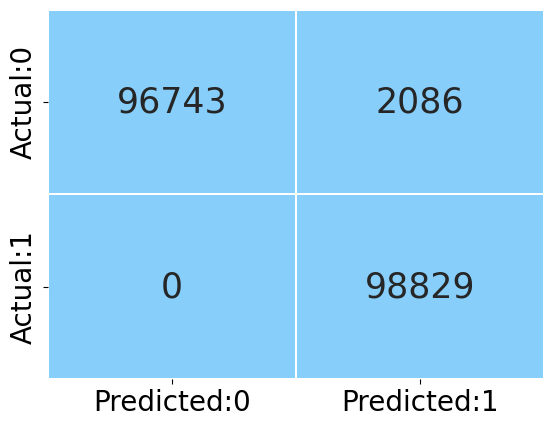

In [88]:
plot_confusion_matrix(xgb_tuned)

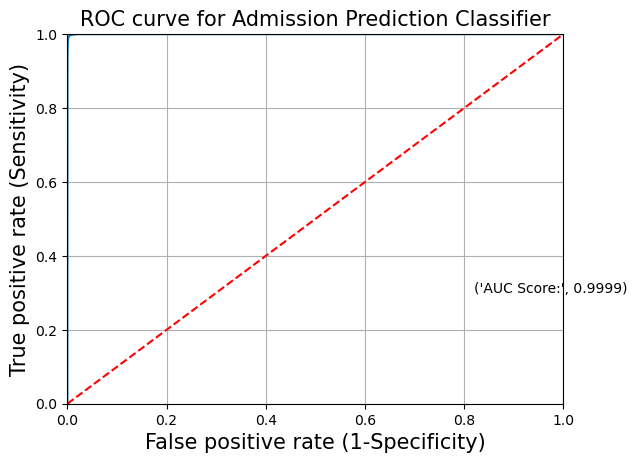

In [89]:
plot_roc(xgb_tuned)

## Modelling over Scaled Data

In [90]:
df_gd.columns

Index(['FOLLOWER_COUNT', 'FOLLOWING_COUNT', 'DATASET_COUNT', 'CODE_COUNT',
       'DISCUSSION_COUNT', 'AVG_NB_READ_TIME_MIN', 'TOTAL_VOTES_GAVE_NB',
       'TOTAL_VOTES_GAVE_DS', 'TOTAL_VOTES_GAVE_DC', 'IS_GLOGIN_True',
       'ISBOT_True'],
      dtype='object')

In [91]:
df_gd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1321188 entries, 0 to 1321187
Data columns (total 11 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   FOLLOWER_COUNT        1321188 non-null  float64
 1   FOLLOWING_COUNT       1321188 non-null  float64
 2   DATASET_COUNT         1321188 non-null  float64
 3   CODE_COUNT            1321188 non-null  float64
 4   DISCUSSION_COUNT      1321188 non-null  float64
 5   AVG_NB_READ_TIME_MIN  1321188 non-null  float64
 6   TOTAL_VOTES_GAVE_NB   1321188 non-null  float64
 7   TOTAL_VOTES_GAVE_DS   1321188 non-null  float64
 8   TOTAL_VOTES_GAVE_DC   1321188 non-null  float64
 9   IS_GLOGIN_True        1321188 non-null  uint8  
 10  ISBOT_True            1321188 non-null  uint8  
dtypes: float64(9), uint8(2)
memory usage: 93.2 MB


In [92]:
df_gd.head()

FOLLOWER_COUNT  FOLLOWING_COUNT  DATASET_COUNT  CODE_COUNT  \
0            53.0             87.0            5.0    3.000000   
1            16.0             67.0            5.0   10.384503   
2            44.0             81.0            4.0   17.000000   
3            23.0            114.0            5.0   24.000000   
4            46.0            112.0            2.0   12.000000   

   DISCUSSION_COUNT  AVG_NB_READ_TIME_MIN  TOTAL_VOTES_GAVE_NB  \
0             124.0             12.742246                 16.0   
1              26.0             24.970000                 14.0   
2             125.0              7.750000                 16.0   
3              67.0             13.400000                 21.0   
4              63.0             24.830000                 10.0   

   TOTAL_VOTES_GAVE_DS  TOTAL_VOTES_GAVE_DC  IS_GLOGIN_True  ISBOT_True  
0                 10.0                  3.0               0           0  
1                  5.0                  2.0               1           0  
2                  4.0                  0.0               1           0  
3                 10.0                  1.0               1           0  
4                  6.0                  2.0               0           0

In [93]:
# Scaling the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_gd.drop(columns=["ISBOT_True"]))
scaled_data = pd.DataFrame(scaled_data, columns=df_gd.drop(columns=["ISBOT_True"]).columns)

In [94]:
scaled_data.columns

Index(['FOLLOWER_COUNT', 'FOLLOWING_COUNT', 'DATASET_COUNT', 'CODE_COUNT',
       'DISCUSSION_COUNT', 'AVG_NB_READ_TIME_MIN', 'TOTAL_VOTES_GAVE_NB',
       'TOTAL_VOTES_GAVE_DS', 'TOTAL_VOTES_GAVE_DC', 'IS_GLOGIN_True'],
      dtype='object')

In [95]:
#For Base-model we use stats model 
X = scaled_data
X = sm.add_constant(X) # adding constant
y = df_gd['ISBOT_True']

smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

#Train Test Split in 70:30 with random_state = 42
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=42)
print(X_train.shape,
      X_test.shape,
      y_train.shape,
      y_test.shape)

(1383611, 11) (592977, 11) (1383611,) (592977,)


In [96]:
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

0    0.500101
1    0.499899
Name: ISBOT_True, dtype: float64
1    0.500235
0    0.499765
Name: ISBOT_True, dtype: float64


In [97]:
base_model = sm.Logit(y_train,X_train).fit()
base_model.summary()

         Current function value: inf
         Iterations: 35


C:\Users\Sahil\anaconda03\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Sahil\anaconda03\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Sahil\anaconda03\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             ISBOT_True   No. Observations:              1383611
Model:                          Logit   Df Residuals:                  1383600
Method:                           MLE   Df Model:                           10
Date:                Wed, 12 Apr 2023   Pseudo R-squ.:                     inf
Time:                        11:19:20   Log-Likelihood:                   -inf
converged:                      False   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -9.8697     17.685     -0.558      0.577     -44.532      24.792
FOLLOWER_COUNT          -1.2763      0.014    -90.392      0.000      -1.304      -1.249
FOLLOWING_COUNT         -1.2642      0.014    -87.477      0.000      -1.293      -1.236
DATASET_COUNT           -1.2254      0.016    -78.595      0.000      -1.256      -1.195
CODE_COUNT              -1.2708      0.013    -96.327      0.000      -1.297      -1.245
DISCUSSION_COUNT        -1.2621      0.013   -100.316      0.000      -1.287      -1.237
AVG_NB_READ_TIME_MIN    -1.2569      0.013    -97.971      0.000      -1.282      -1.232
TOTAL_VOTES_GAVE_NB     -0.0021      0.007     -0.288      0.773      -0.016       0.012
TOTAL_VOTES_GAVE_DS      0.0025      0.007      0.343      0.731      -0.012       0.017
TOTAL_VOTES_GAVE_DC      0.0022      0.007      0.301      0.764      -0.012       0.016
IS_GLOGIN_True          -7.6650     24.404     -0.314      0.753     -55.497      40.167
========================================================================================

Possibly complete quasi-separation: A fraction 0.29 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [98]:
# Base Model 2 of scaled Data

In [99]:
X = scaled_data[['FOLLOWER_COUNT', 'FOLLOWING_COUNT', 'DATASET_COUNT', 'CODE_COUNT',
       'DISCUSSION_COUNT', 'AVG_NB_READ_TIME_MIN']]
y  = df_gd['ISBOT_True']
X= sm.add_constant(X)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=42)
print(X_train.shape,
      X_test.shape,
      y_train.shape,
      y_test.shape)

(924831, 7) (396357, 7) (924831,) (396357,)


In [100]:
base_model2 = sm.Logit(y_train,X_train).fit()
base_model2.summary()

Optimization terminated successfully.
         Current function value: inf
         Iterations 10


C:\Users\Sahil\anaconda03\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Sahil\anaconda03\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             ISBOT_True   No. Observations:               924831
Model:                          Logit   Df Residuals:                   924824
Method:                           MLE   Df Model:                            6
Date:                Wed, 12 Apr 2023   Pseudo R-squ.:                     inf
Time:                        11:19:31   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -5.2396      0.024   -221.250      0.000      -5.286      -5.193
FOLLOWER_COUNT          -1.2339      0.016    -76.663      0.000      -1.265      -1.202
FOLLOWING_COUNT         -1.2181      0.016    -74.062      0.000      -1.250      -1.186
DATASET_COUNT           -1.1700      0.018    -66.569      0.000      -1.204      -1.136
CODE_COUNT              -1.2381      0.015    -82.357      0.000      -1.268      -1.209
DISCUSSION_COUNT        -1.2288      0.014    -85.801      0.000      -1.257      -1.201
AVG_NB_READ_TIME_MIN    -1.2267      0.015    -83.867      0.000      -1.255      -1.198
========================================================================================

Possibly complete quasi-separation: A fraction 0.26 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

### LR Model over Scaled Data

In [144]:
X = scaled_data[['FOLLOWER_COUNT', 'FOLLOWING_COUNT', 'DATASET_COUNT', 'CODE_COUNT',
       'DISCUSSION_COUNT', 'AVG_NB_READ_TIME_MIN']]
y  = df_gd['ISBOT_True']
#X= sm.add_constant(X)
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

# Define the number of folds for cross-validation
k = 10

# Initialize the evaluation metrics
lrs_acc_scores = []
lrs_prec_scores = []
lrs_rec_scores = []
dts_acc_scores = []
dts_prec_scores = []
dts_rec_scores = []
rfs_acc_scores = []
rfs_prec_scores = []
rfs_rec_scores = []
xgbs_acc_scores = []
xgbs_prec_scores = []
xgbs_rec_scores = []

# Initialize the cross-validation splitter
cv = StratifiedKFold(n_splits=k)

# Train and evaluate the models using k-fold cross-validation
for train_idx, val_idx in cv.split(X, y):
    # Split the data into training and validation sets
    X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
    X_val, y_val = X.iloc[val_idx], y.iloc[val_idx]
    
    # Fit the logistic regression model on the training set
    lrs_model = LogisticRegression()
    lrs_model.fit(X_train, y_train)
    
    # Evaluate the logistic regression model on the validation set
    y_pred = lrs_model.predict(X_val)
    lrs_acc_scores.append(accuracy_score(y_val, y_pred))
    lrs_prec_scores.append(precision_score(y_val, y_pred))
    lrs_rec_scores.append(recall_score(y_val, y_pred))
    
    # Fit the decision tree model on the training set
    dts_model = DecisionTreeClassifier()
    dts_model.fit(X_train, y_train)
    
    # Evaluate the decision tree model on the validation set
    y_pred = dts_model.predict(X_val)
    dts_acc_scores.append(accuracy_score(y_val, y_pred))
    dts_prec_scores.append(precision_score(y_val, y_pred))
    dts_rec_scores.append(recall_score(y_val, y_pred))
    
    # Fit the random forest model on the training set
    rfs_model = RandomForestClassifier()
    rfs_model.fit(X_train, y_train)
    
    # Evaluate the random forest model on the validation set
    y_pred = rfs_model.predict(X_val)
    rfs_acc_scores.append(accuracy_score(y_val, y_pred))
    rfs_prec_scores.append(precision_score(y_val, y_pred))
    rfs_rec_scores.append(recall_score(y_val, y_pred))
    
    # Fit the XGBoost model on the training set
    xgbs_model = xgb.XGBClassifier()
    xgbs_model.fit(X_train, y_train)
    
    # Evaluate the XGBoost model on the validation set
    y_pred = xgbs_model.predict(X_val)
    xgbs_acc_scores.append(accuracy_score(y_val, y_pred))
    xgbs_prec_scores.append(precision_score(y_val, y_pred))
    xgbs_rec_scores.append(recall_score(y_val, y_pred))

# Average the evaluation metrics across all folds
lrs_mean_acc = sum(lrs_acc_scores) / k
lrs_mean_prec = sum(lrs_prec_scores) / k
lrs_mean_rec = sum(lrs_rec_scores) / k

# Average the evaluation metrics across all folds
dts_mean_acc = sum(dts_acc_scores) / k
dts_mean_prec = sum(dts_prec_scores) / k
dts_mean_rec = sum(dts_rec_scores) / k

# Average the evaluation metrics across all folds
rfs_mean_acc = sum(rfs_acc_scores) / k
rfs_mean_prec = sum(rfs_prec_scores) / k
rfs_mean_rec = sum(rfs_rec_scores) / k

# Average the evaluation metrics across all folds
xgbs_mean_acc = sum(xgbs_acc_scores) / k
xgbs_mean_prec = sum(xgbs_prec_scores) / k
xgbs_mean_rec = sum(xgbs_rec_scores) / k

print('LOGISTIC REGRESSION MODEL')
print('Accuracy: {:.2f}'.format(lrs_mean_acc))
print('Precision: {:.2f}'.format(lrs_mean_prec))
print('Recall: {:.2f}'.format(lrs_mean_rec))

print('DECISION TREE MODEL')
print('Accuracy: {:.2f}'.format(dts_mean_acc))
print('Precision: {:.2f}'.format(dts_mean_prec))
print('Recall: {:.2f}'.format(dts_mean_rec))

print('RANDOM FOREST MODEL')
print('Accuracy: {:.2f}'.format(rfs_mean_acc))
print('Precision: {:.2f}'.format(rfs_mean_prec))
print('Recall: {:.2f}'.format(rfs_mean_rec))

print("XGBOOST MODEL")
print('Accuracy: {:.2f}'.format(xgbs_mean_acc))
print('Precision: {:.2f}'.format(xgbs_mean_prec))
print('Recall: {:.2f}'.format(xgbs_mean_rec))

LOGISTIC REGRESSION MODEL
Accuracy: 0.99
Precision: 0.98
Recall: 1.00
DECISION TREE MODEL
Accuracy: 0.98
Precision: 0.98
Recall: 0.99
RANDOM FOREST MODEL
Accuracy: 0.99
Precision: 0.98
Recall: 1.00
XGBOOST MODEL
Accuracy: 0.99
Precision: 0.98
Recall: 1.00


              precision    recall  f1-score   support

           0       1.00      0.98      0.99    889465
           1       0.98      1.00      0.99    889465

    accuracy                           0.99   1778930
   macro avg       0.99      0.99      0.99   1778930
weighted avg       0.99      0.99      0.99   1778930

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     98829
           1       0.98      1.00      0.99     98829

    accuracy                           0.99    197658
   macro avg       0.99      0.99      0.99    197658
weighted avg       0.99      0.99      0.99    197658



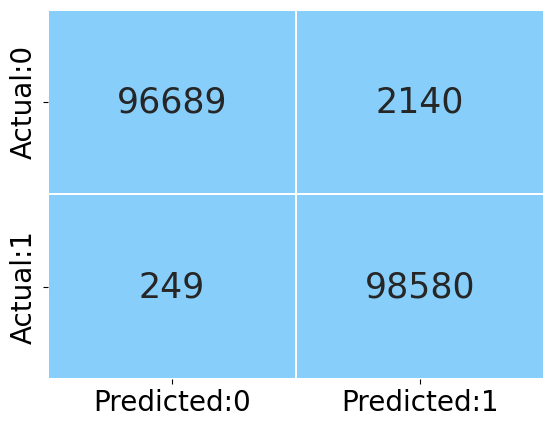

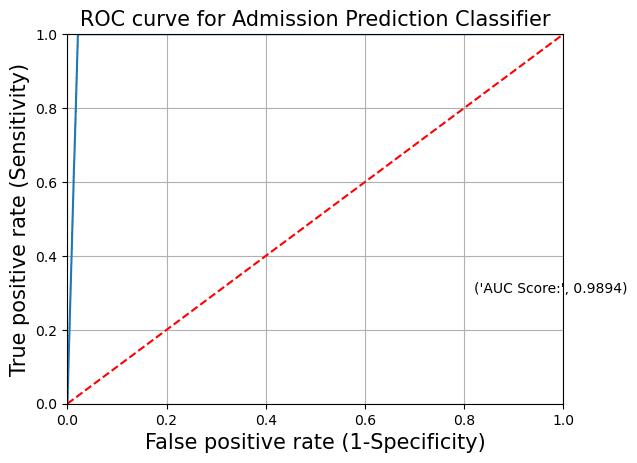

In [102]:
Train_Report_s = get_train_report(lrs_model)
print(Train_Report_s)

Test_Report_s = get_test_report(lrs_model)
print(Test_Report_s)

plot_confusion_matrix(lrs_model)

plot_roc(lrs_model)

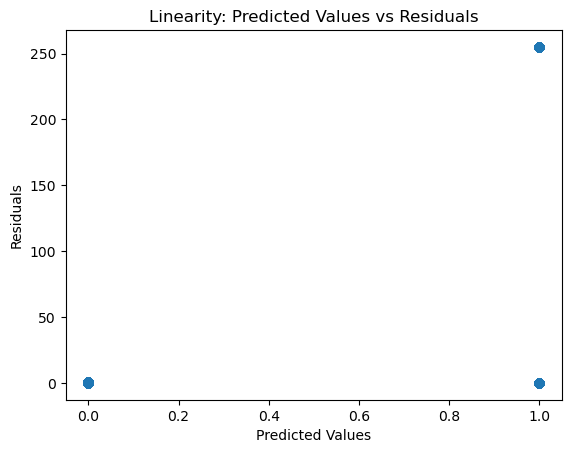

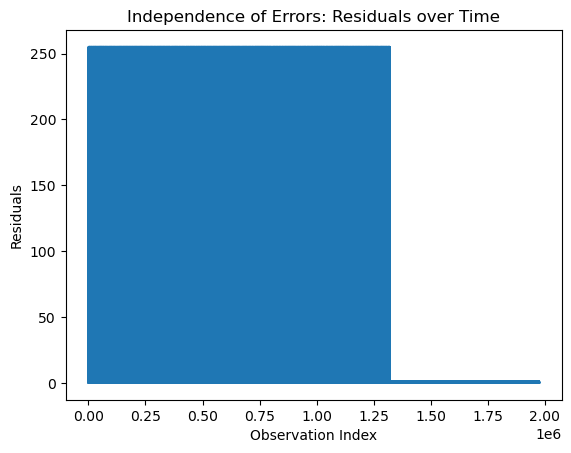

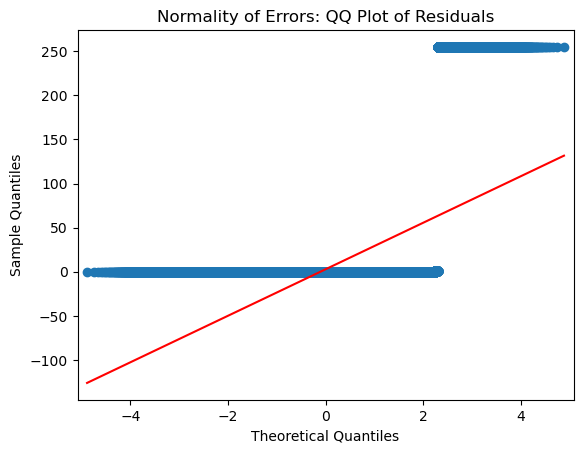

In [132]:
residuals = y - lrs_model.predict(X)
plt.scatter(lrs_model.predict(X), residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Linearity: Predicted Values vs Residuals')
plt.show()

plt.plot(residuals)
plt.xlabel('Observation Index')
plt.ylabel('Residuals')
plt.title('Independence of Errors: Residuals over Time')
plt.show()

sm.qqplot(residuals, line='s')
plt.title('Normality of Errors: QQ Plot of Residuals')
plt.show()

**Interpretation:** The red dotted line represents the ROC curve of a Logistic Regression; a good classifier stays as far away from that line as possible (toward the top-left corner).<br>
From the above plot, we can see that the stacking model is away from the dotted line; with the AUC score 0.9995.

### Decision Tree model over scaled data

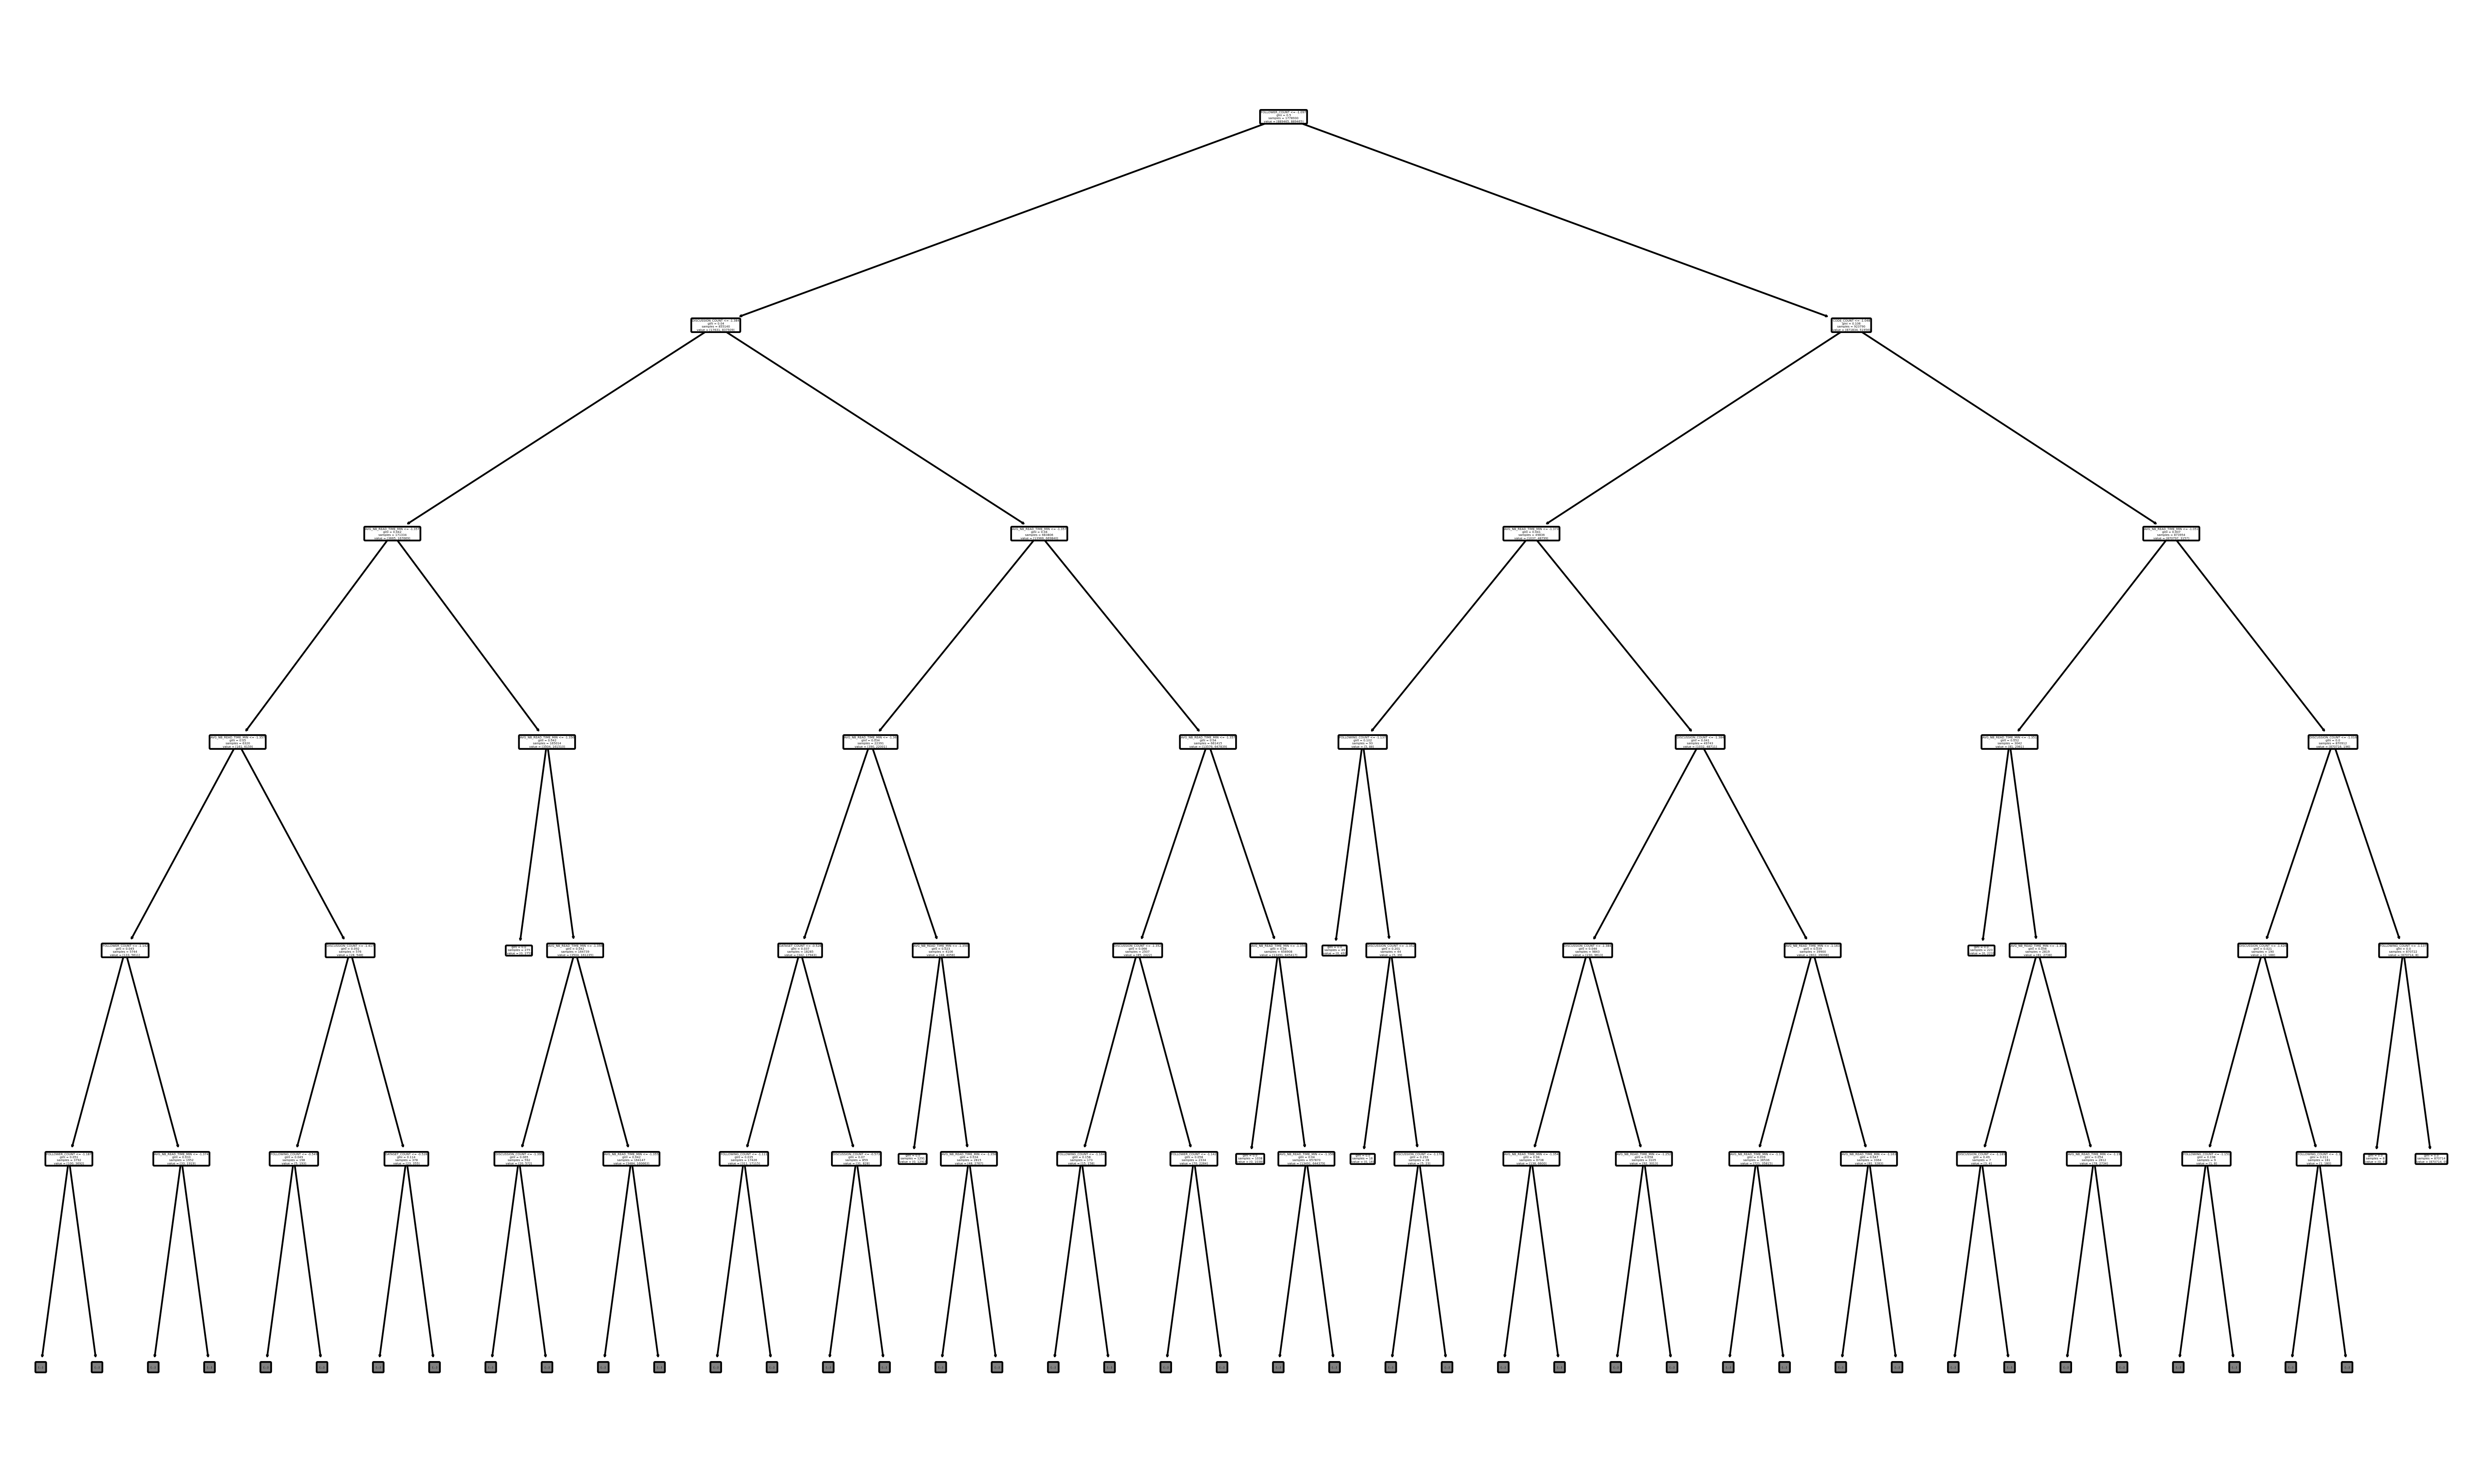

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    889465
           1       0.98      1.00      0.99    889465

    accuracy                           0.99   1778930
   macro avg       0.99      0.99      0.99   1778930
weighted avg       0.99      0.99      0.99   1778930

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     98829
           1       0.98      1.00      0.99     98829

    accuracy                           0.99    197658
   macro avg       0.99      0.99      0.99    197658
weighted avg       0.99      0.99      0.99    197658



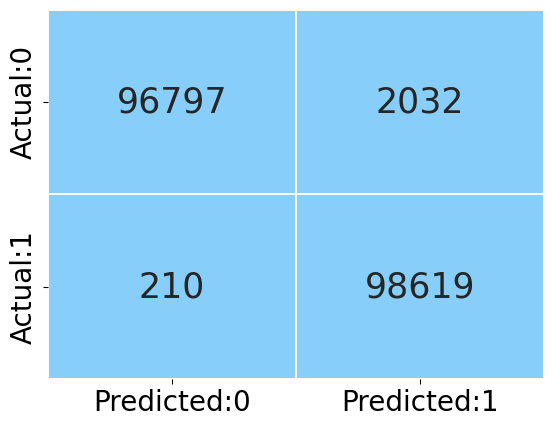

None
None


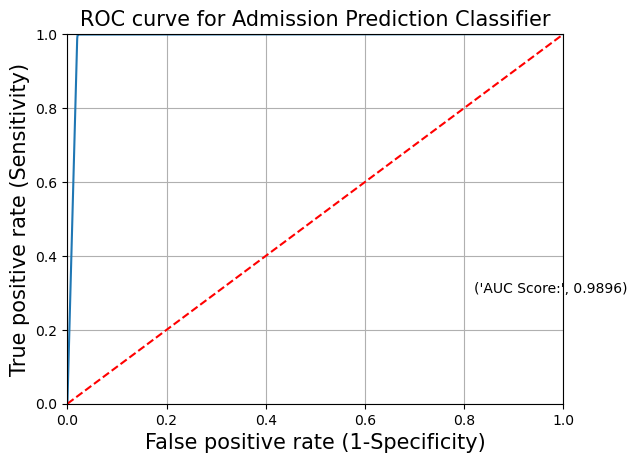

In [135]:
## Decision tree

plt.figure(figsize=(25,15),dpi=300)
tree.plot_tree(dts_model,max_depth=5,feature_names=X_train.columns,rounded=True)
plt.show()

train_report_s = get_train_report(dts_model)

# print the performance measures
print(train_report_s)

test_report_s = get_test_report(dts_model)

# print the performance measures
print(test_report_s)
print(plot_confusion_matrix(dts_model))
print(plot_roc(dts_model))

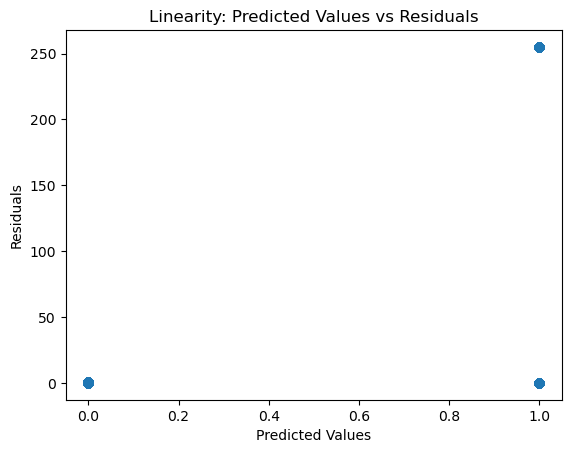

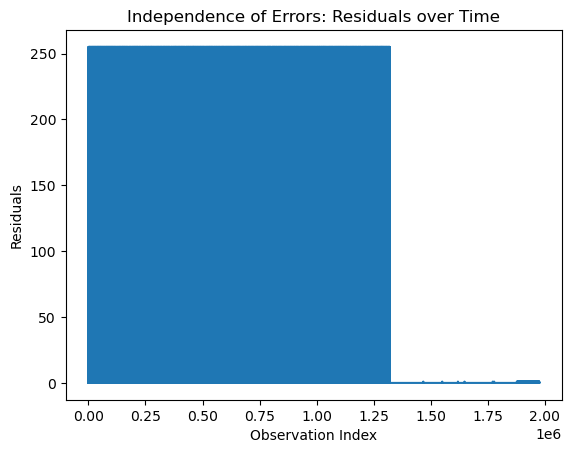

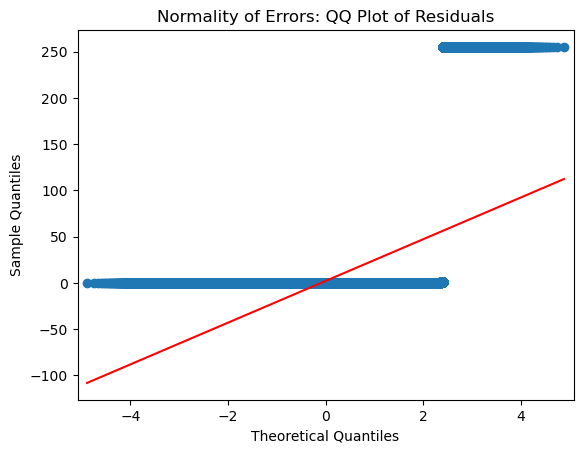

In [136]:
residuals = y - dts_model.predict(X)
plt.scatter(dts_model.predict(X), residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Linearity: Predicted Values vs Residuals')
plt.show()

plt.plot(residuals)
plt.xlabel('Observation Index')
plt.ylabel('Residuals')
plt.title('Independence of Errors: Residuals over Time')
plt.show()

sm.qqplot(residuals, line='s')
plt.title('Normality of Errors: QQ Plot of Residuals')
plt.show()

**Interpretation:** The red dotted line represents the ROC curve of a purely Decision Tree; a good classifier stays as far away from that line as possible (toward the top-left corner).<br>
From the above plot, we can see that the stacking model is away from the dotted line; with the AUC score 0.9893.

<AxesSubplot:xlabel='Importance', ylabel='Features'>

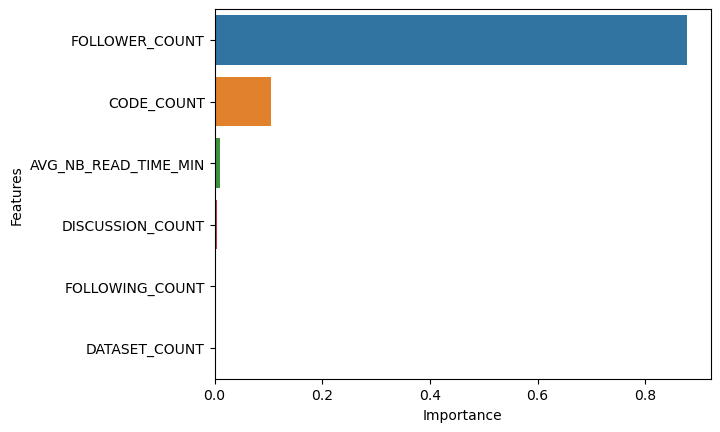

In [104]:
important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': dts_model.feature_importances_})

# sort the dataframe in the descending order according to the feature importance
important_features = important_features.sort_values('Importance', ascending = False)

# create a barplot to visualize the features based on their importance
sns.barplot(x = 'Importance', y = 'Features', data = important_features)

# add plot and axes labels
# set text si

### Random Forest over scaled Data

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    889465
           1       0.98      1.00      0.99    889465

    accuracy                           0.99   1778930
   macro avg       0.99      0.99      0.99   1778930
weighted avg       0.99      0.99      0.99   1778930

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     98829
           1       0.98      1.00      0.99     98829

    accuracy                           0.99    197658
   macro avg       0.99      0.99      0.99    197658
weighted avg       0.99      0.99      0.99    197658



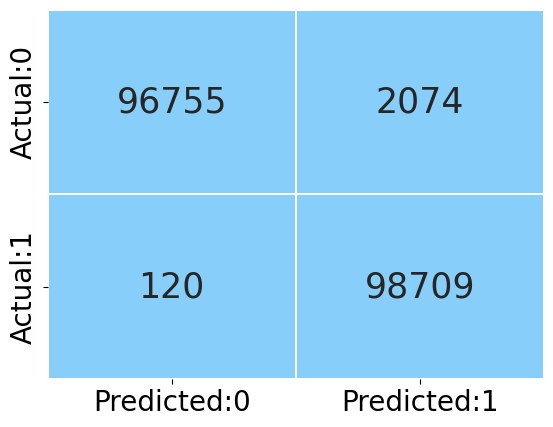

None
None


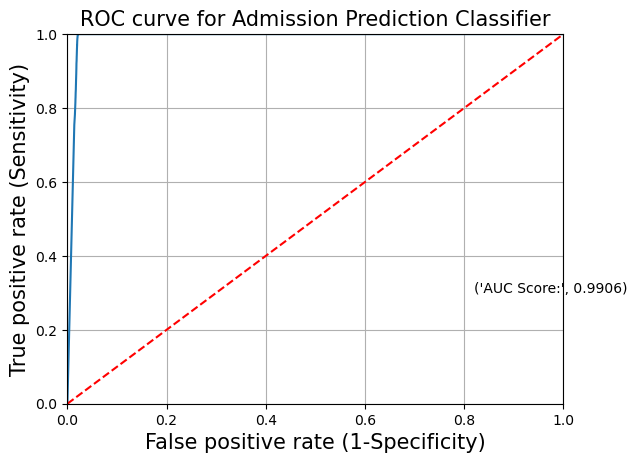

In [105]:

train_report_s = get_train_report(rfs_model)

# print the performace measures
print(train_report_s) 


test_report = get_test_report(rfs_model)

# print the performace measures
print(test_report_s)


print(plot_confusion_matrix(rfs_model))

print(plot_roc(rfs_model))

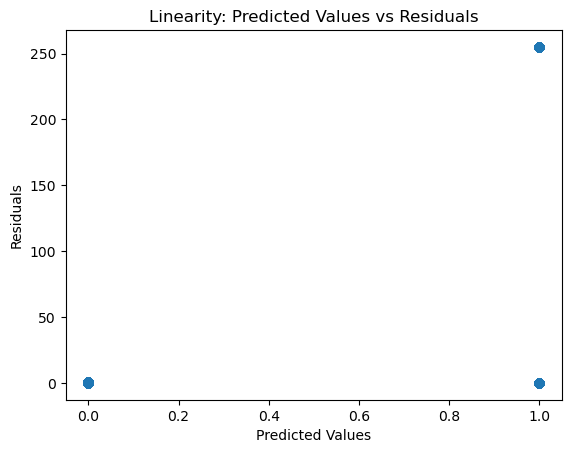

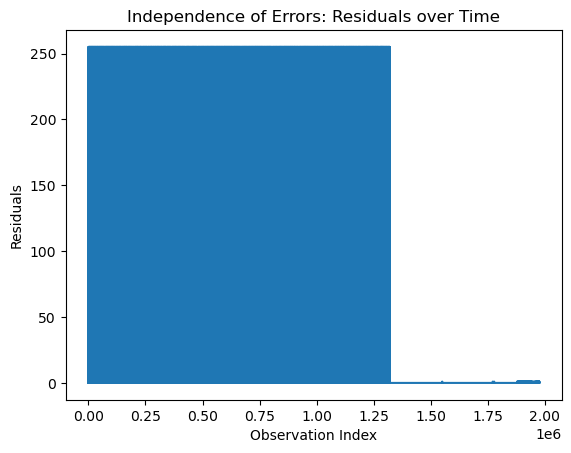

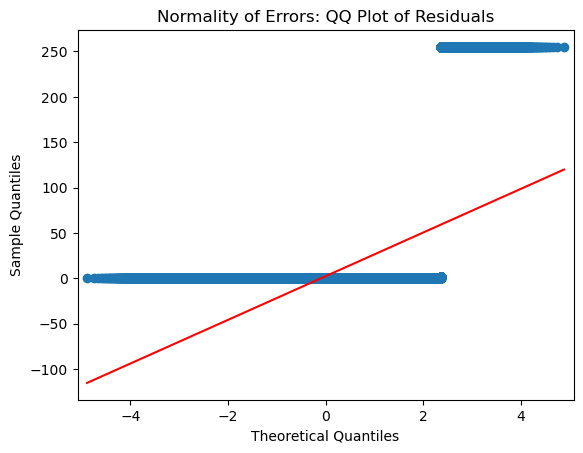

In [147]:
residuals = y - rfs_model.predict(X)
plt.scatter(rfs_model.predict(X), residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Linearity: Predicted Values vs Residuals')
plt.show()

plt.plot(residuals)
plt.xlabel('Observation Index')
plt.ylabel('Residuals')
plt.title('Independence of Errors: Residuals over Time')
plt.show()

sm.qqplot(residuals, line='s')
plt.title('Normality of Errors: QQ Plot of Residuals')
plt.show()

**Interpretation:** The red dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).<br>
From the above plot, we can see that the stacking model is away from the dotted line; with the AUC score 0.9903.

<AxesSubplot:xlabel='Importance', ylabel='Features'>

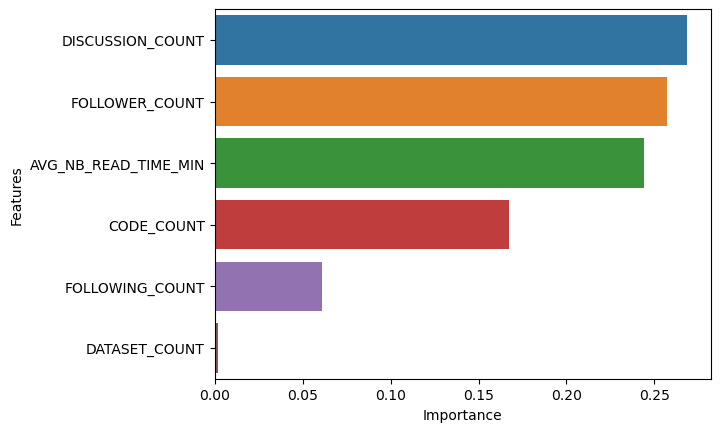

In [106]:
important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': rfs_model.feature_importances_})

# sort the dataframe in the descending order according to the feature importance
important_features = important_features.sort_values('Importance', ascending = False)

# create a barplot to visualize the features based on their importance
sns.barplot(x = 'Importance', y = 'Features', data = important_features)

# add plot and axes labels
# set text si

### XGBoost model over scaled data

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    889465
           1       0.98      1.00      0.99    889465

    accuracy                           0.99   1778930
   macro avg       0.99      0.99      0.99   1778930
weighted avg       0.99      0.99      0.99   1778930

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     98829
           1       0.98      1.00      0.99     98829

    accuracy                           0.99    197658
   macro avg       0.99      0.99      0.99    197658
weighted avg       0.99      0.99      0.99    197658



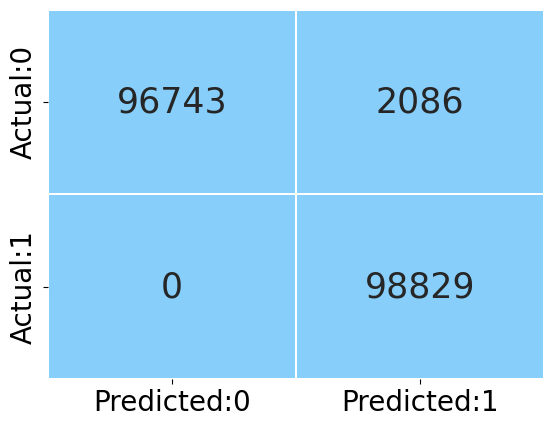

None
None


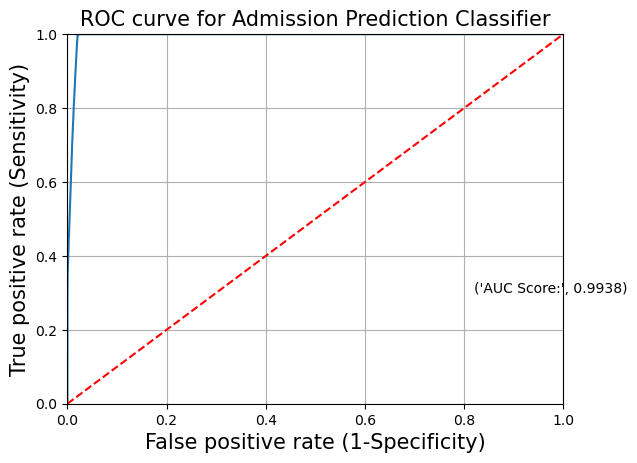

In [145]:
train_report_s = get_train_report(xgbs_model)

# print the performance measures
print(train_report_s)

test_report_s = get_test_report(xgbs_model)

# print the performance measures
print(test_report_s)


print(plot_confusion_matrix(xgbs_model))

print(plot_roc(xgbs_model))

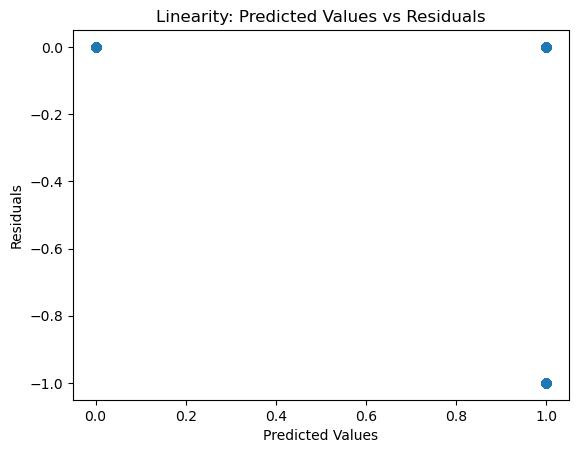

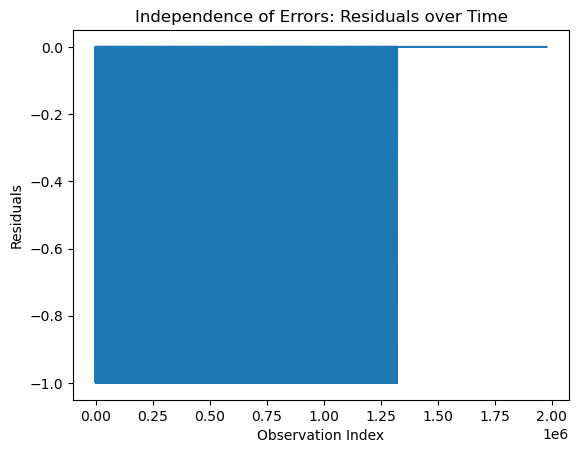

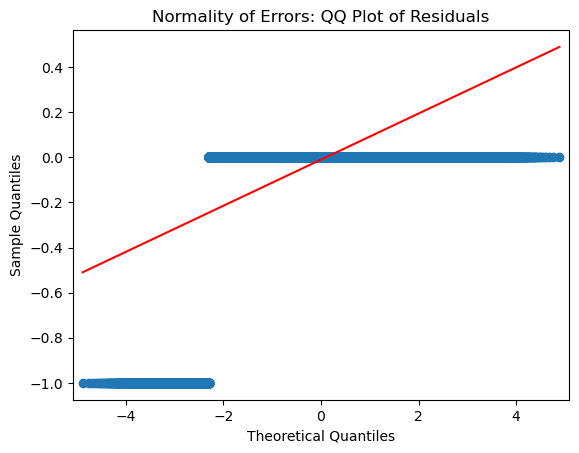

In [146]:
residuals = y - xgbs_model.predict(X)
plt.scatter(xgbs_model.predict(X), residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Linearity: Predicted Values vs Residuals')
plt.show()

plt.plot(residuals)
plt.xlabel('Observation Index')
plt.ylabel('Residuals')
plt.title('Independence of Errors: Residuals over Time')
plt.show()

sm.qqplot(residuals, line='s')
plt.title('Normality of Errors: QQ Plot of Residuals')
plt.show()

<AxesSubplot:xlabel='Importance', ylabel='Features'>

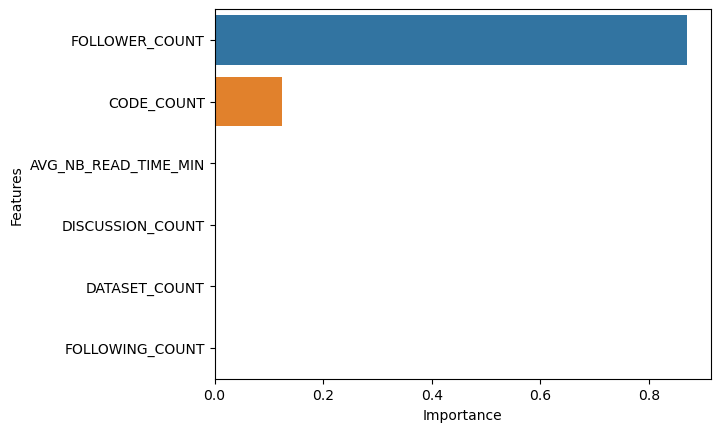

In [110]:
important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': xgbs_model.feature_importances_})

# sort the dataframe in the descending order according to the feature importance
important_features = important_features.sort_values('Importance', ascending = False)

# create a barplot to visualize the features based on their importance
sns.barplot(x = 'Importance', y = 'Features', data = important_features)

# add plot and axes labels
# set text si

**Interpretation:** The red dotted line represents the ROC curve of a purely XG Boost; a good classifier stays as far away from that line as possible (toward the top-left corner).<br>
From the above plot, we can see that the stacking model is away from the dotted line; with the AUC score 0.9938.

In [111]:
######################## HYPERPARAMETER TUNING on scaled data ######################################

tuning_parameters = {'learning_rate': [0.01, 0.1, 1],
                     'max_depth': [5,6,7],
                     'gamma': [2,3,4]}

# instantiate the 'XGBClassifier' 
xgbs_model = XGBClassifier()

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the XGBoost classifier model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 3
# scoring: pass a measure to evaluate the model on test set
xgbs_grid = GridSearchCV(estimator = xgbs_model, param_grid = tuning_parameters, scoring = 'roc_auc')

# fit the model on X_train and y_train using fit()
xgbs_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for XGBoost classifier: ', xgb_grid.best_params_, '\n')

Best parameters for XGBoost classifier:  {'gamma': 3, 'learning_rate': 1, 'max_depth': 6} 



In [113]:
xgbs_tuned_sc = XGBClassifier(max_depth = 6, gamma = 3, learning_rate = 1)

# fit the model using fit() on train data
xgbs_tuned_sc.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=3, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    889465
           1       0.98      1.00      0.99    889465

    accuracy                           0.99   1778930
   macro avg       0.99      0.99      0.99   1778930
weighted avg       0.99      0.99      0.99   1778930

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     98829
           1       0.98      1.00      0.99     98829

    accuracy                           0.99    197658
   macro avg       0.99      0.99      0.99    197658
weighted avg       0.99      0.99      0.99    197658



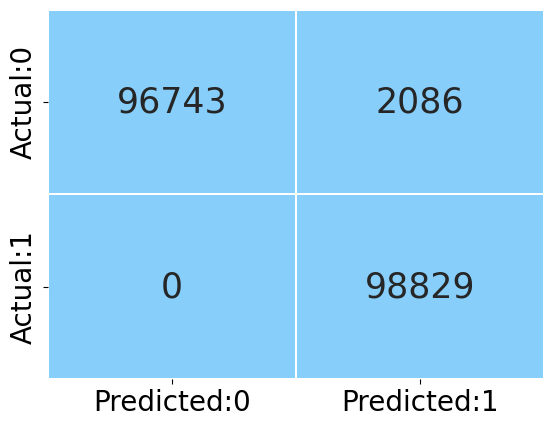

None
None


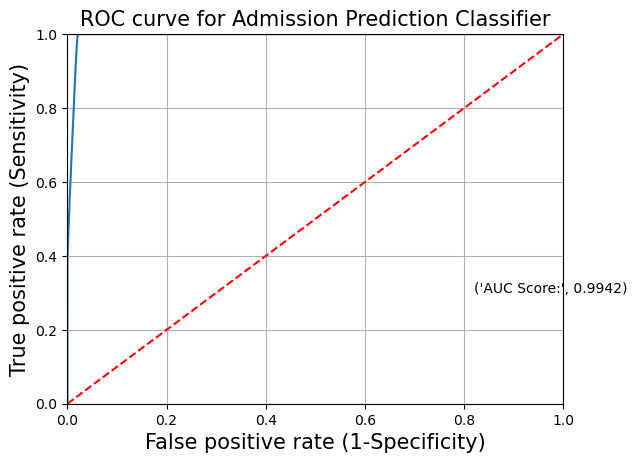

In [128]:
train_report_xgbs_s = get_train_report(xgbs_tuned_sc)

# print the performance measures
print(train_report_s)

test_report_xgbs_s = get_test_report(xgbs_tuned_sc)

# print the performance measures
print(test_report_xgbs_s)


print(plot_confusion_matrix(xgbs_tuned_sc))

print(plot_roc(xgbs_tuned_sc))

<AxesSubplot:xlabel='Importance', ylabel='Features'>

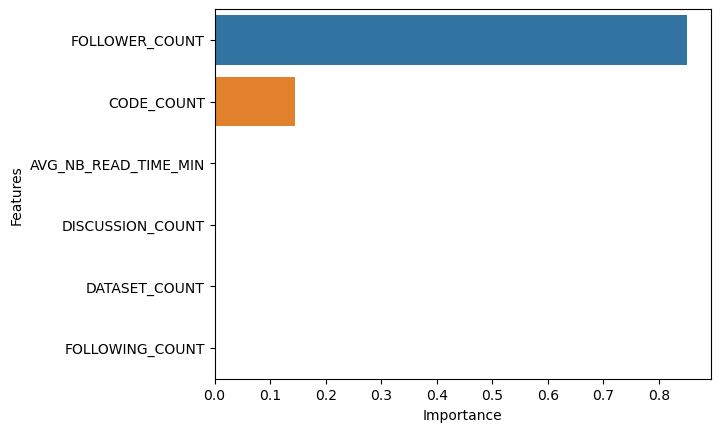

In [127]:
important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': xgbs_tuned_sc.feature_importances_})

# sort the dataframe in the descending order according to the feature importance
important_features = important_features.sort_values('Importance', ascending = False)

# create a barplot to visualize the features based on their importance
sns.barplot(x = 'Importance', y = 'Features', data = important_features)

**Interpretation:** The red dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).<br>
From the above plot, we can see that the stacking model is away from the dotted line; with the AUC score 0.9943.

In [ ]:
import matplotlib.pyplot as plt

# Define evaluation metrics for each model
models = ["Model 1", "Model 2", "Model 3"]  # Names of the models
accuracy = [0.85, 0.90, 0.88]  # Accuracy scores for each model
precision = [0.82, 0.88, 0.85]  # Precision scores for each model
recall = [0.88, 0.92, 0.90]  # Recall scores for each model
f1_score = [0.85, 0.90, 0.88]  # F1 scores for each model

# Create a bar chart to compare evaluation metrics
plt.figure(figsize=(10, 6))  # Set the figure size
plt.bar(models, accuracy, width=0.2, label='Accuracy')  # Plot accuracy scores
plt.bar([model + 0.2 for model in models], precision, width=0.2, label='Precision')  # Plot precision scores
plt.bar([model + 0.4 for model in models], recall, width=0.2, label='Recall')  # Plot recall scores
plt.bar([model + 0.6 for model in models], f1_score, width=0.2, label='F1 Score')  # Plot F1 scores

# Set chart properties
plt.xlabel('Models')  # Set x-axis label
plt.ylabel('Score')  # Set y-axis label
plt.title('Comparison of Evaluation Metrics for Classification Models')  # Set chart title
plt.legend()  # Add legend
plt.ylim(0, 1)  # Set y-axis limits

# Show the chart
plt.show()

### Conclusion: 
Even after performing various models and Boosting parameters we receive an Overfit condition but also after considering the models performed above, it can be noticed that XGBoost after hyperparameter tunning performs the best with 0.9999% accuracy on the unscaled data. 